<a href="https://colab.research.google.com/github/sriharshini13/IIITH_INTERNSHIP/blob/main/TASK_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title:
# **Automated Crop Health Monitoring Using YOLOv8**

#  Objective / Problem Statement:
Crop diseases significantly impact agricultural productivity, leading to reduced yields and economic losses. Early detection and classification of plant diseases are crucial to take timely corrective actions and ensure crop health. Traditional manual monitoring is time-consuming, error-prone, and requires expert intervention.

This project aims to develop an automated crop disease detection system using YOLOv8, a real-time object detection model, that can identify and classify diseases in various crops by analyzing leaf images.

#  Main Goal:

To build a computer vision-based system that:

Detects different types of crop diseases in real-time from leaf images.

Utilizes YOLOv8 object detection architecture for high accuracy and speed.

Trains the model using a custom-annotated dataset derived from publicly available sources (Kaggle + Roboflow).

Allows users to test the trained model on new images to detect plant diseases automatically.



# Step 1: Project Setup

**1.1. Create Folder Structure**

Open VS Code and create a main project folder named:

    CropHealthMonitoring/
Inside it, create the following subfolders:

    CropHealthMonitoring/
    ├── dataset/
    │   ├── train/
    │   │   ├── images/
    │   │   └── labels/
    │   ├── valid/
    │   │   ├── images/
    │   │   └── labels/
    │   ├── test/
    │   │   ├── images/
    │   │   └── labels/
    │   └── data.yaml
    ├── yolov8_train.py
    ├── yolov8_infer.py
    ├── test.jpg               # Sample image to test
    ├── runs/                  # Will be generated after training
    └── README.md              # Optional documentation
---
#Step 2: Environment Setup

**2.1. Install Python**

Install Python 3.10 or above from:
👉 https://www.python.org/downloads

During installation, enable “Add Python to PATH”.

**2.2. Create and Activate Virtual Environment (Recommended)**

In VS Code terminal:

    python -m venv venv
    venv\Scripts\activate     # On Windows

**2.3. Install Required Packages**
    pip install ultralytics opencv-python roboflow
---
#Step 3: Download Dataset

**3.1. Go to Kaggle**
Visit this dataset:
     https://www.kaggle.com/datasets/emmarex/plantdisease

Download and unzip the dataset.

**3.2. Organize the Images**

You will now annotate these images using Roboflow.

---

#Step 4: Annotate with Roboflow

**4.1. Sign in to Roboflow**
https://app.roboflow.com

**4.2. Create New Project**

Name: plant-disease-detection

Type: Object Detection

License: any

Upload your images (at least 100+ for good training)

**4.3. Annotate**

Manually draw bounding boxes around infected or healthy leaves.

Assign proper class labels like:

    Pepper__bell___Bacterial_spot
    Pepper__bell___healthy
    Potato___Early_blight
    Potato___Late_blight
    Potato___healthy
    Tomato_Septoria_leaf_spot
    Tomato__Target_Spot
    Tomato__Tomato_YellowLeaf__Curl_Virus
    Tomato__Tomato_mosaic_virus

**4.4. Generate and Download Dataset**

Click Generate Dataset → Click Download

Choose format: YOLOv8 PyTorch

Unzip the dataset and place the contents inside your dataset/ folder structure.

# Step 5: Verify Dataset
Check your folder structure:

    dataset/
    ├── train/
    │   ├── images/
    │   └── labels/
    ├── valid/
    │   ├── images/
    │   └── labels/
    ├── test/
    │   ├── images/
    │   └── labels/
    └── data.yaml

Check data.yaml:

yaml

    train: train/images
    val: valid/images
    test: test/images

    nc: 9
    names: [
      'Pepper__bell___Bacterial_spot',
      'Pepper__bell___healthy',
      'Potato___Early_blight',
      'Potato___Late_blight',
      'Potato___healthy',
      'Tomato_Septoria_leaf_spot',
      'Tomato__Target_Spot',
      'Tomato__Tomato_YellowLeaf__Curl_Virus',
      'Tomato__Tomato_mosaic_virus'
    ]

---

#Step 6: Train YOLOv8

**6.1. yolov8_train.py**

python
    from ultralytics import YOLO

    # Load the YOLOv8 model (nano version for speed)
    model = YOLO('yolov8n.pt')

    # Train on custom dataset
    model.train(
        data='dataset/data.yaml',
        epochs=30,
        imgsz=640,
        batch=8,
        name='crop_health_model',
        device='cpu'   # Use 'cuda' if you have GPU
    )

**6.2. Run the Script**

    python yolov8_train.py
✅ This will create a
    runs/detect/crop_health_model/weights/best.pt
  file after training.

---

#Step 7: Test with an Image

**7.1. Add a test image**

Put a sample leaf image as test.jpg in the project folder.

**7.2. yolov8_infer.py**

    from ultralytics import YOLO

    # Load the trained model
    model = YOLO("runs/detect/crop_health_model/weights/best.pt")

    # Run inference
    results = model("test.jpg", save=True, imgsz=640, conf=0.25)

    # Show result
    results[0].show()

**7.3. Run the Inference**

    python yolov8_infer.py
✅ The prediction image will be saved in runs/detect/predict/.

---
# Final Folder Summary

    CropHealthMonitoring/
    ├── dataset/
    │   ├── train/
    │   ├── valid/
    │   ├── test/
    │   └── data.yaml
    ├── yolov8_train.py
    ├── yolov8_infer.py
    ├── test.jpg
    ├── runs/
    │   └── detect/
    │       ├── crop_health_model/
    │       │   └── weights/
    │       │       └── best.pt
    │       └── predict/
    └── README.md

---

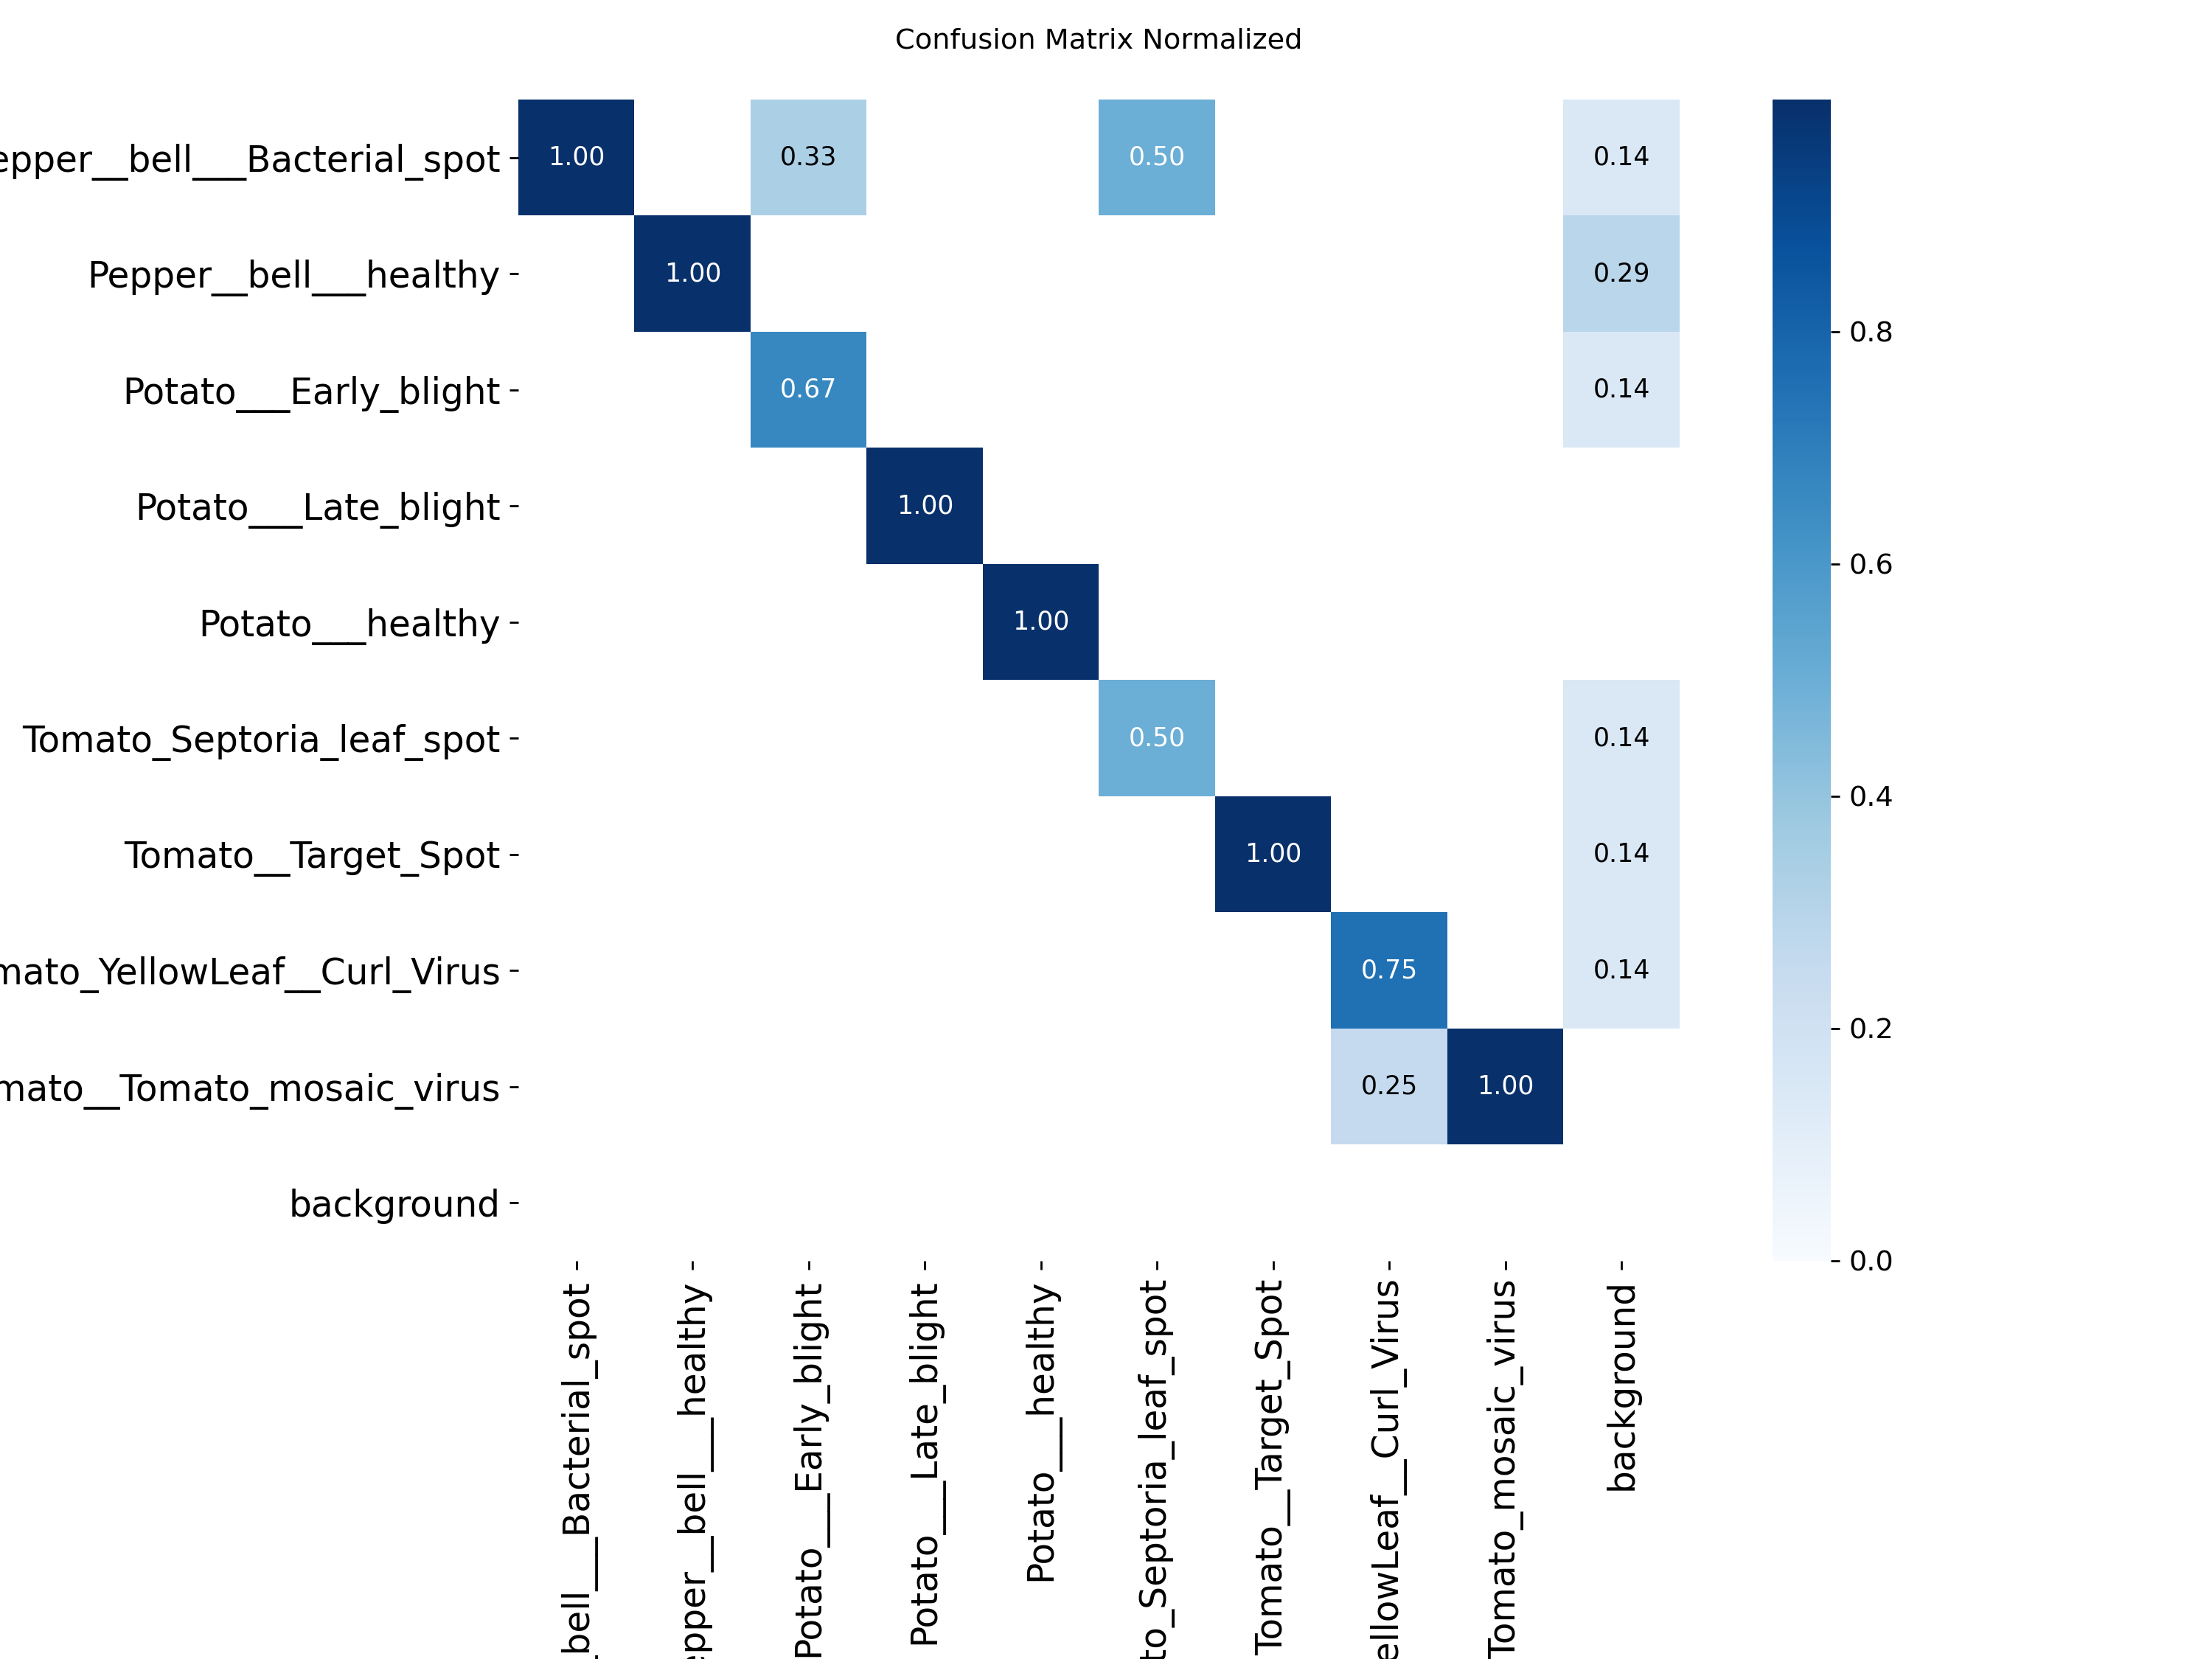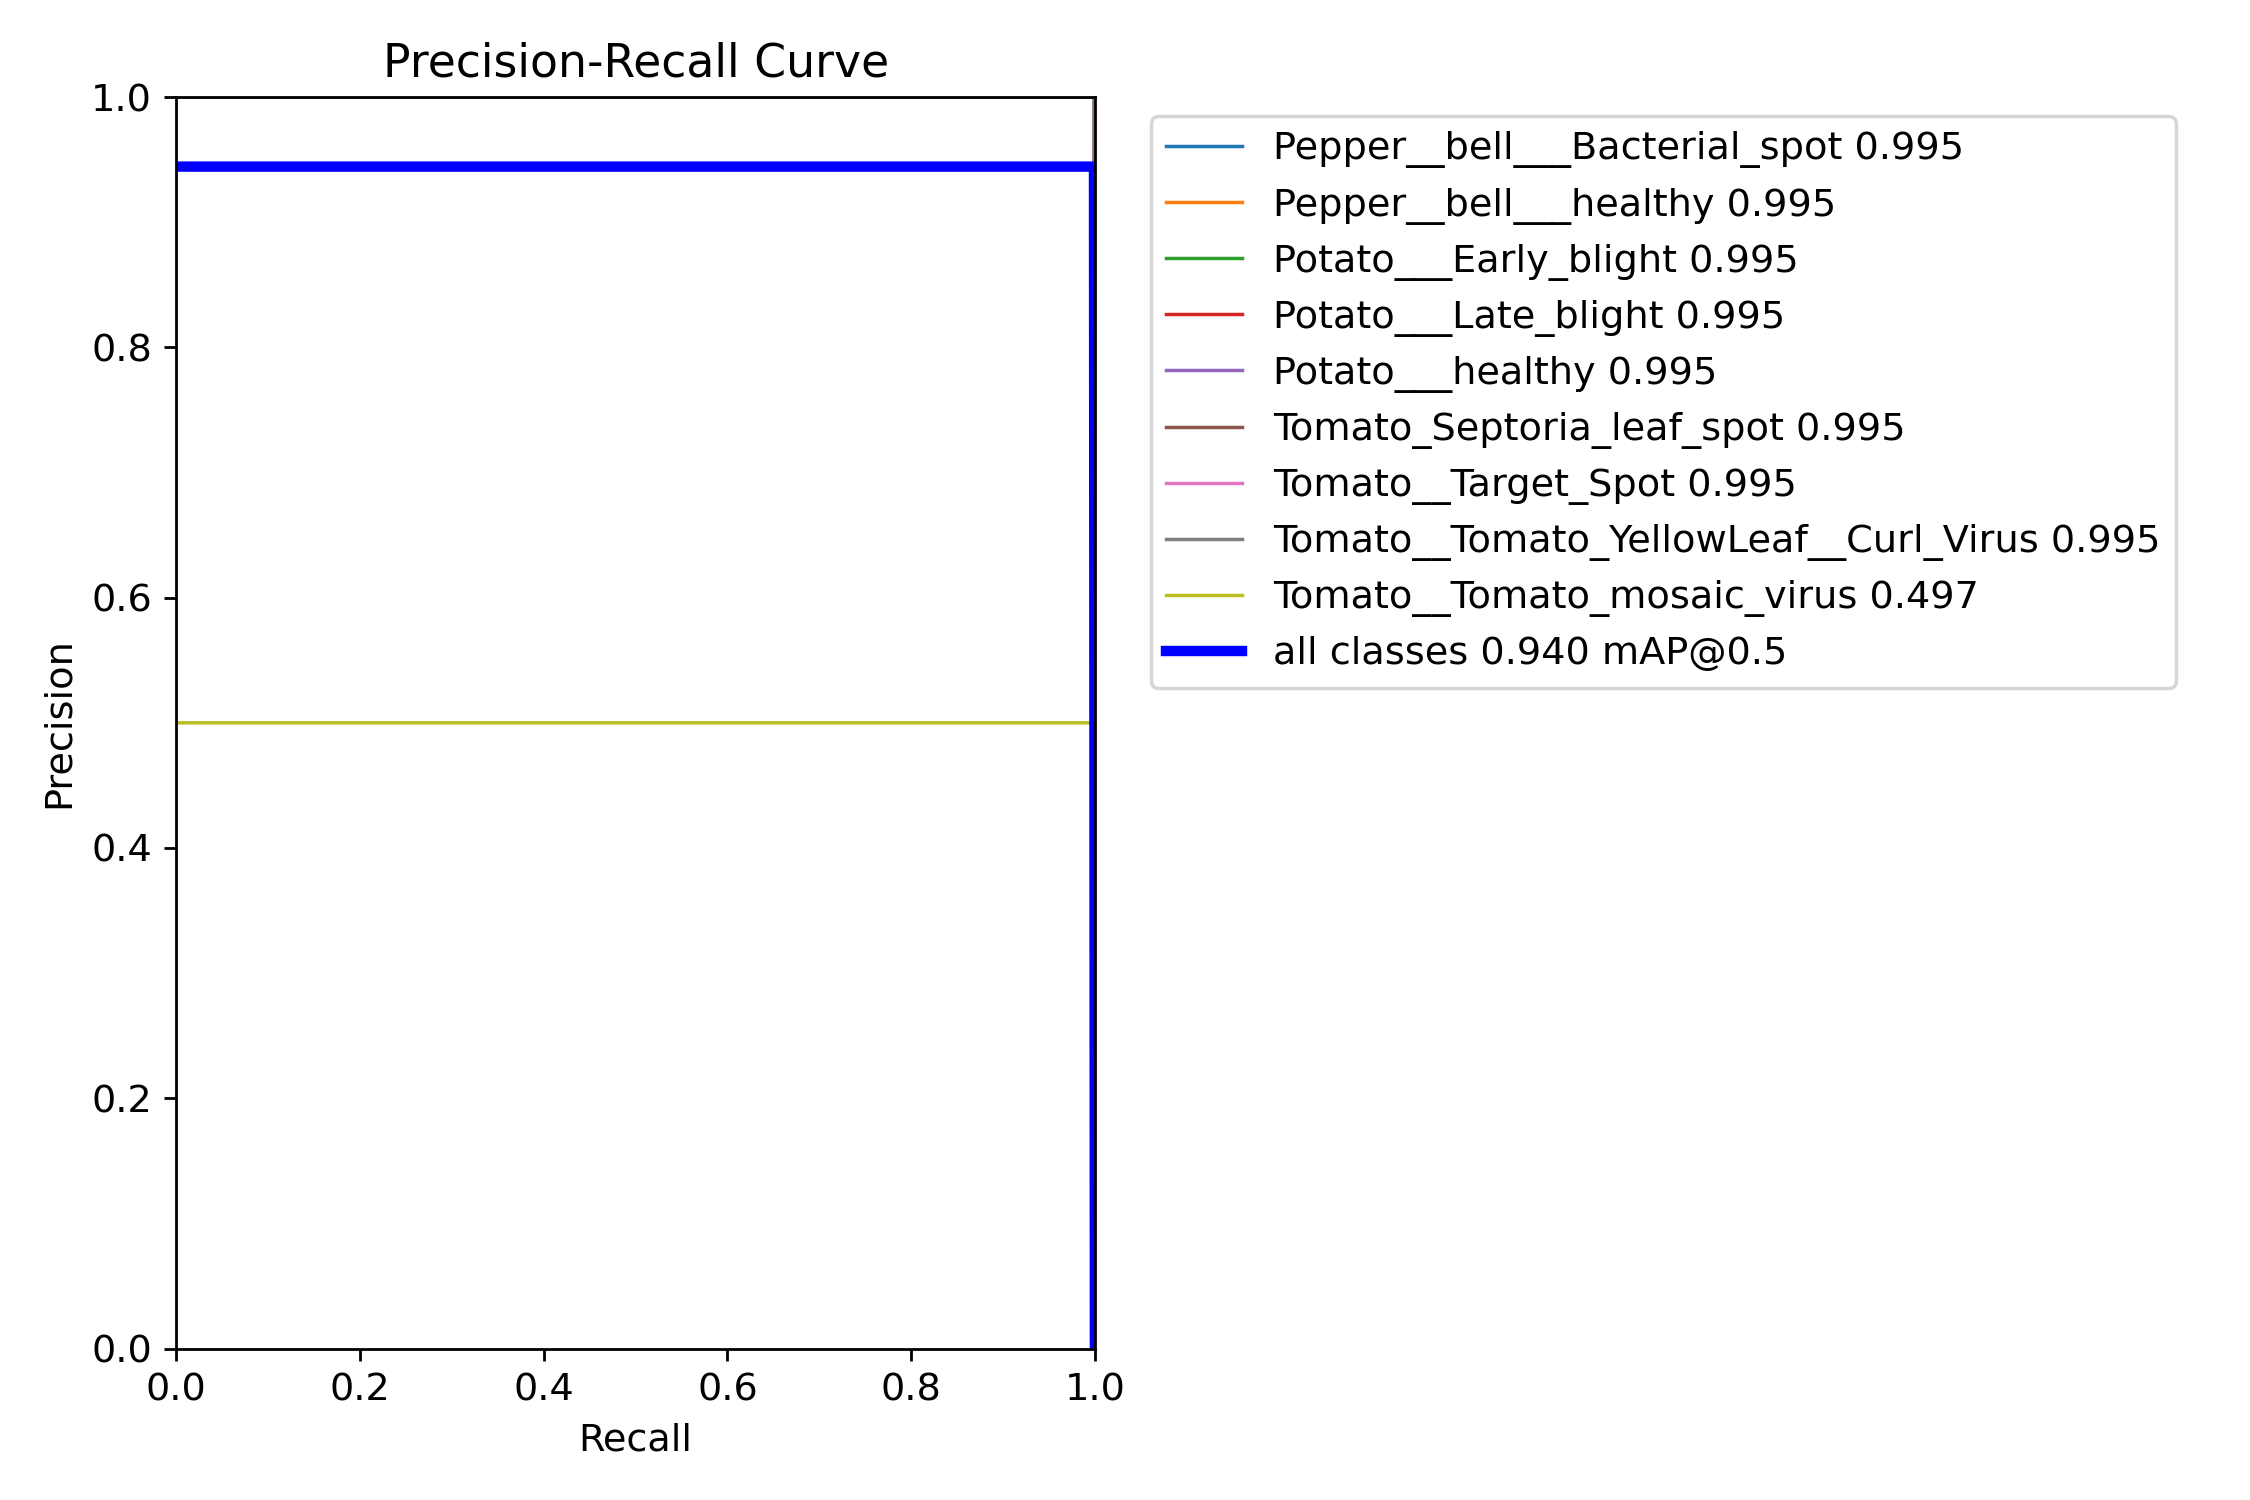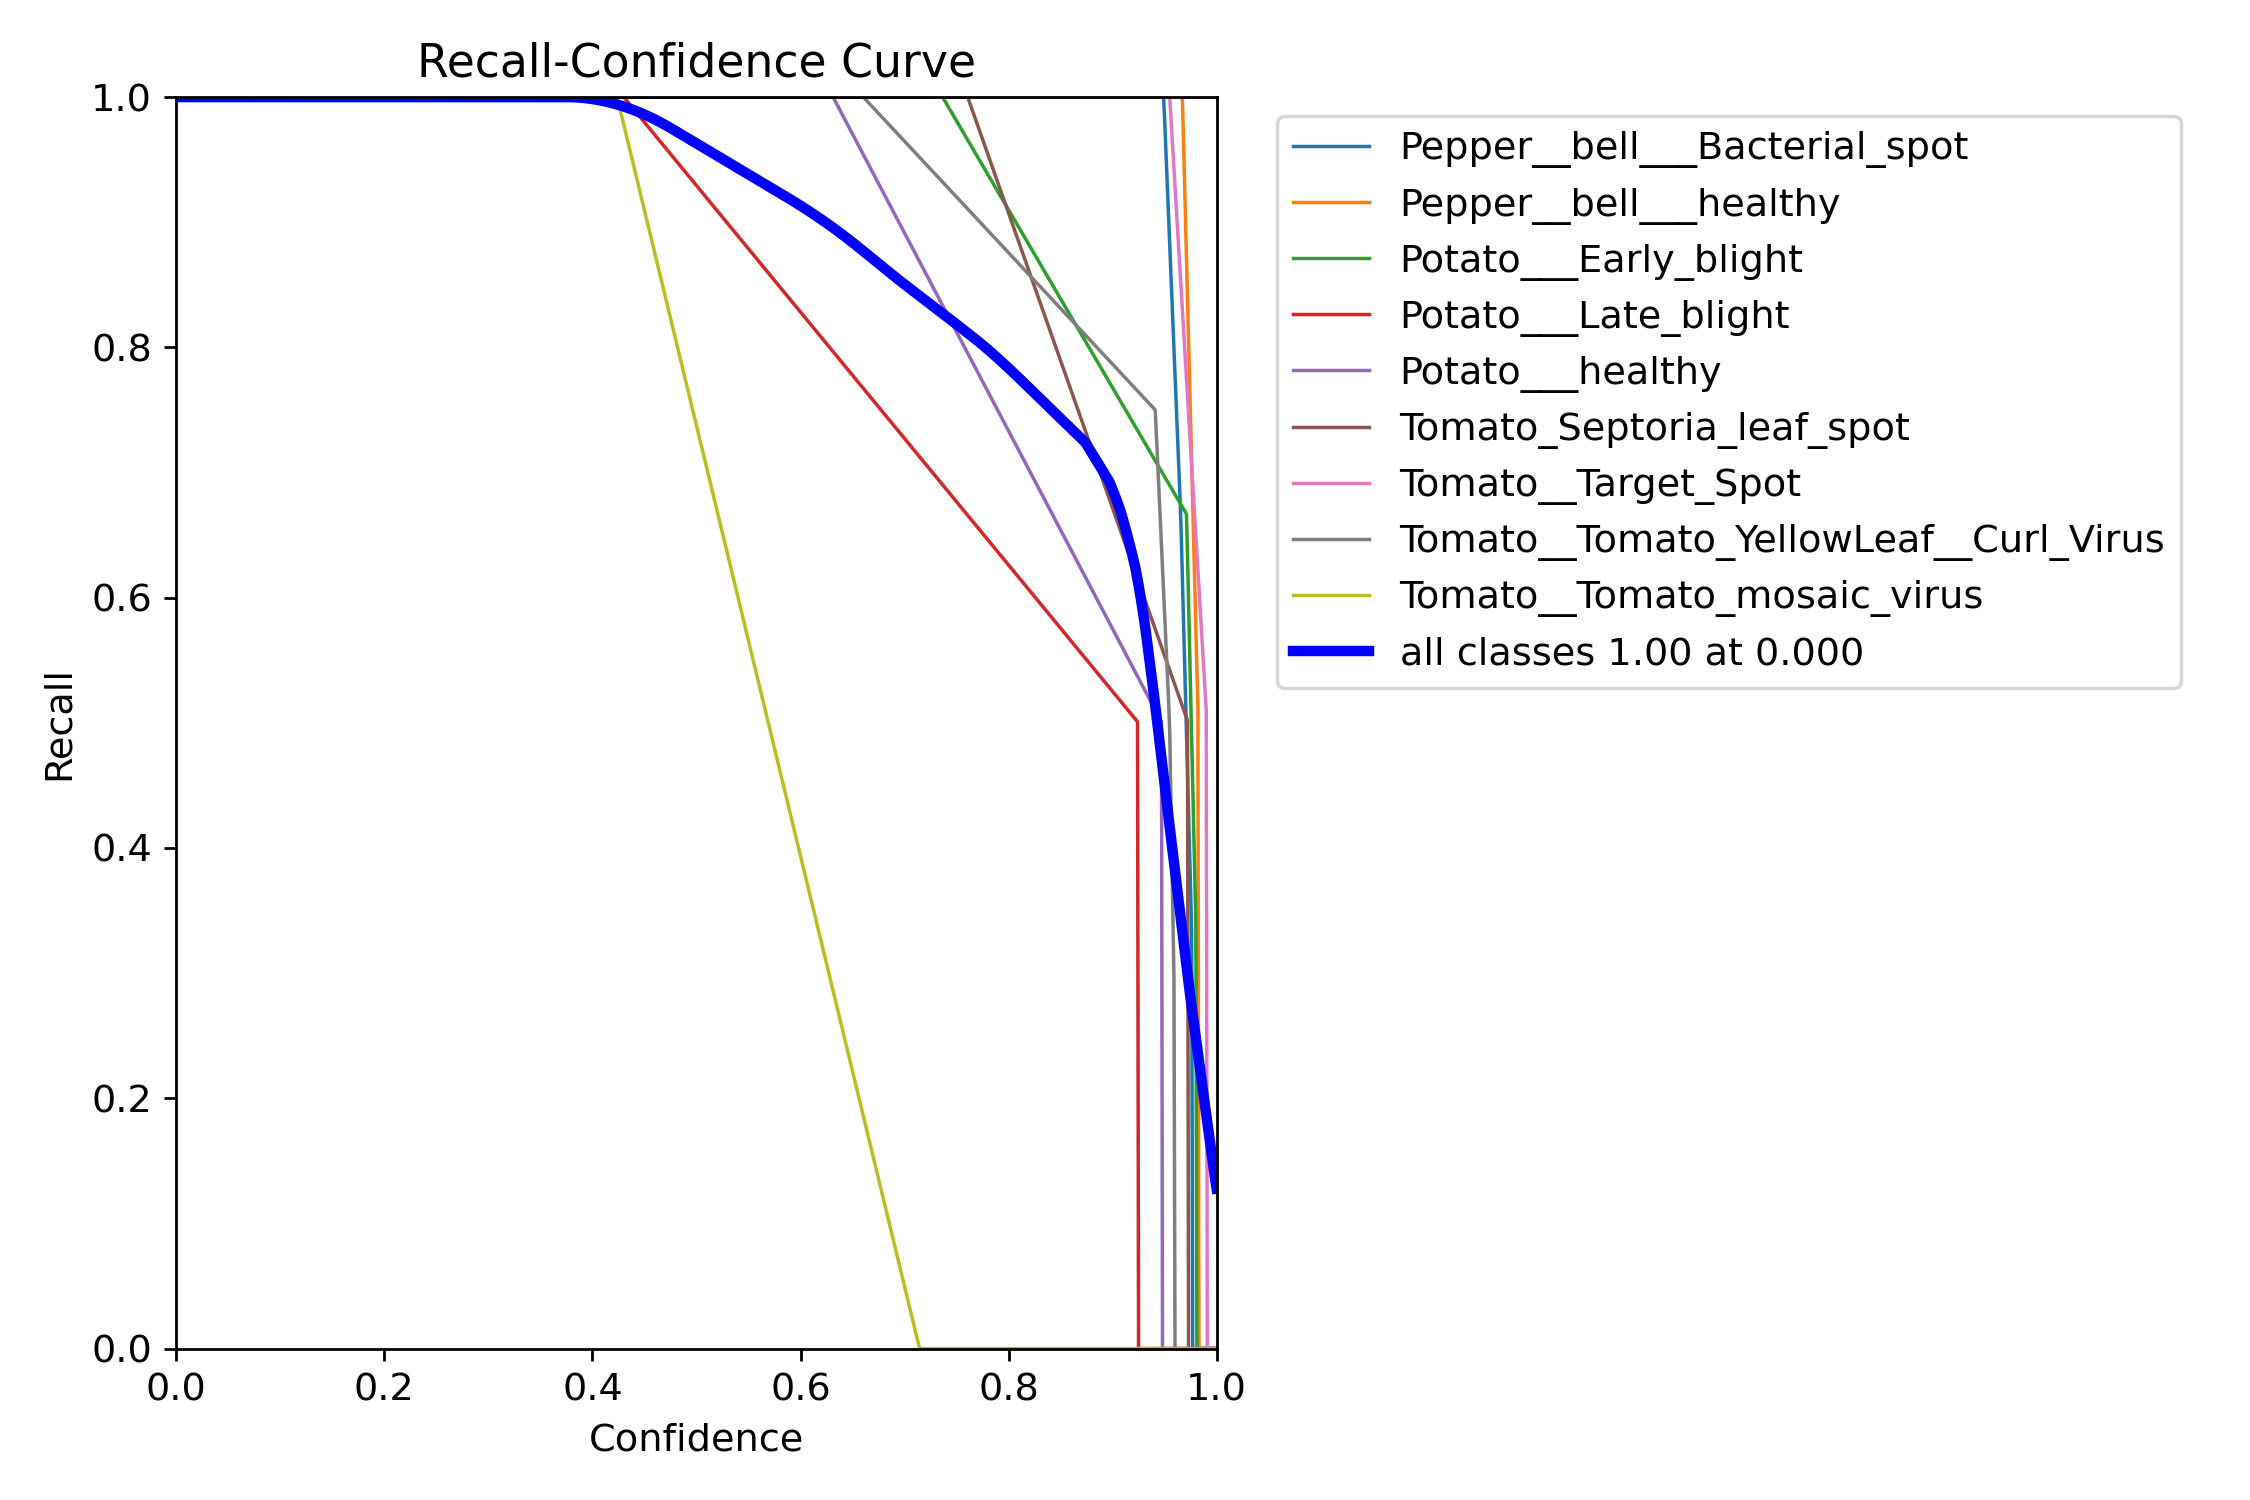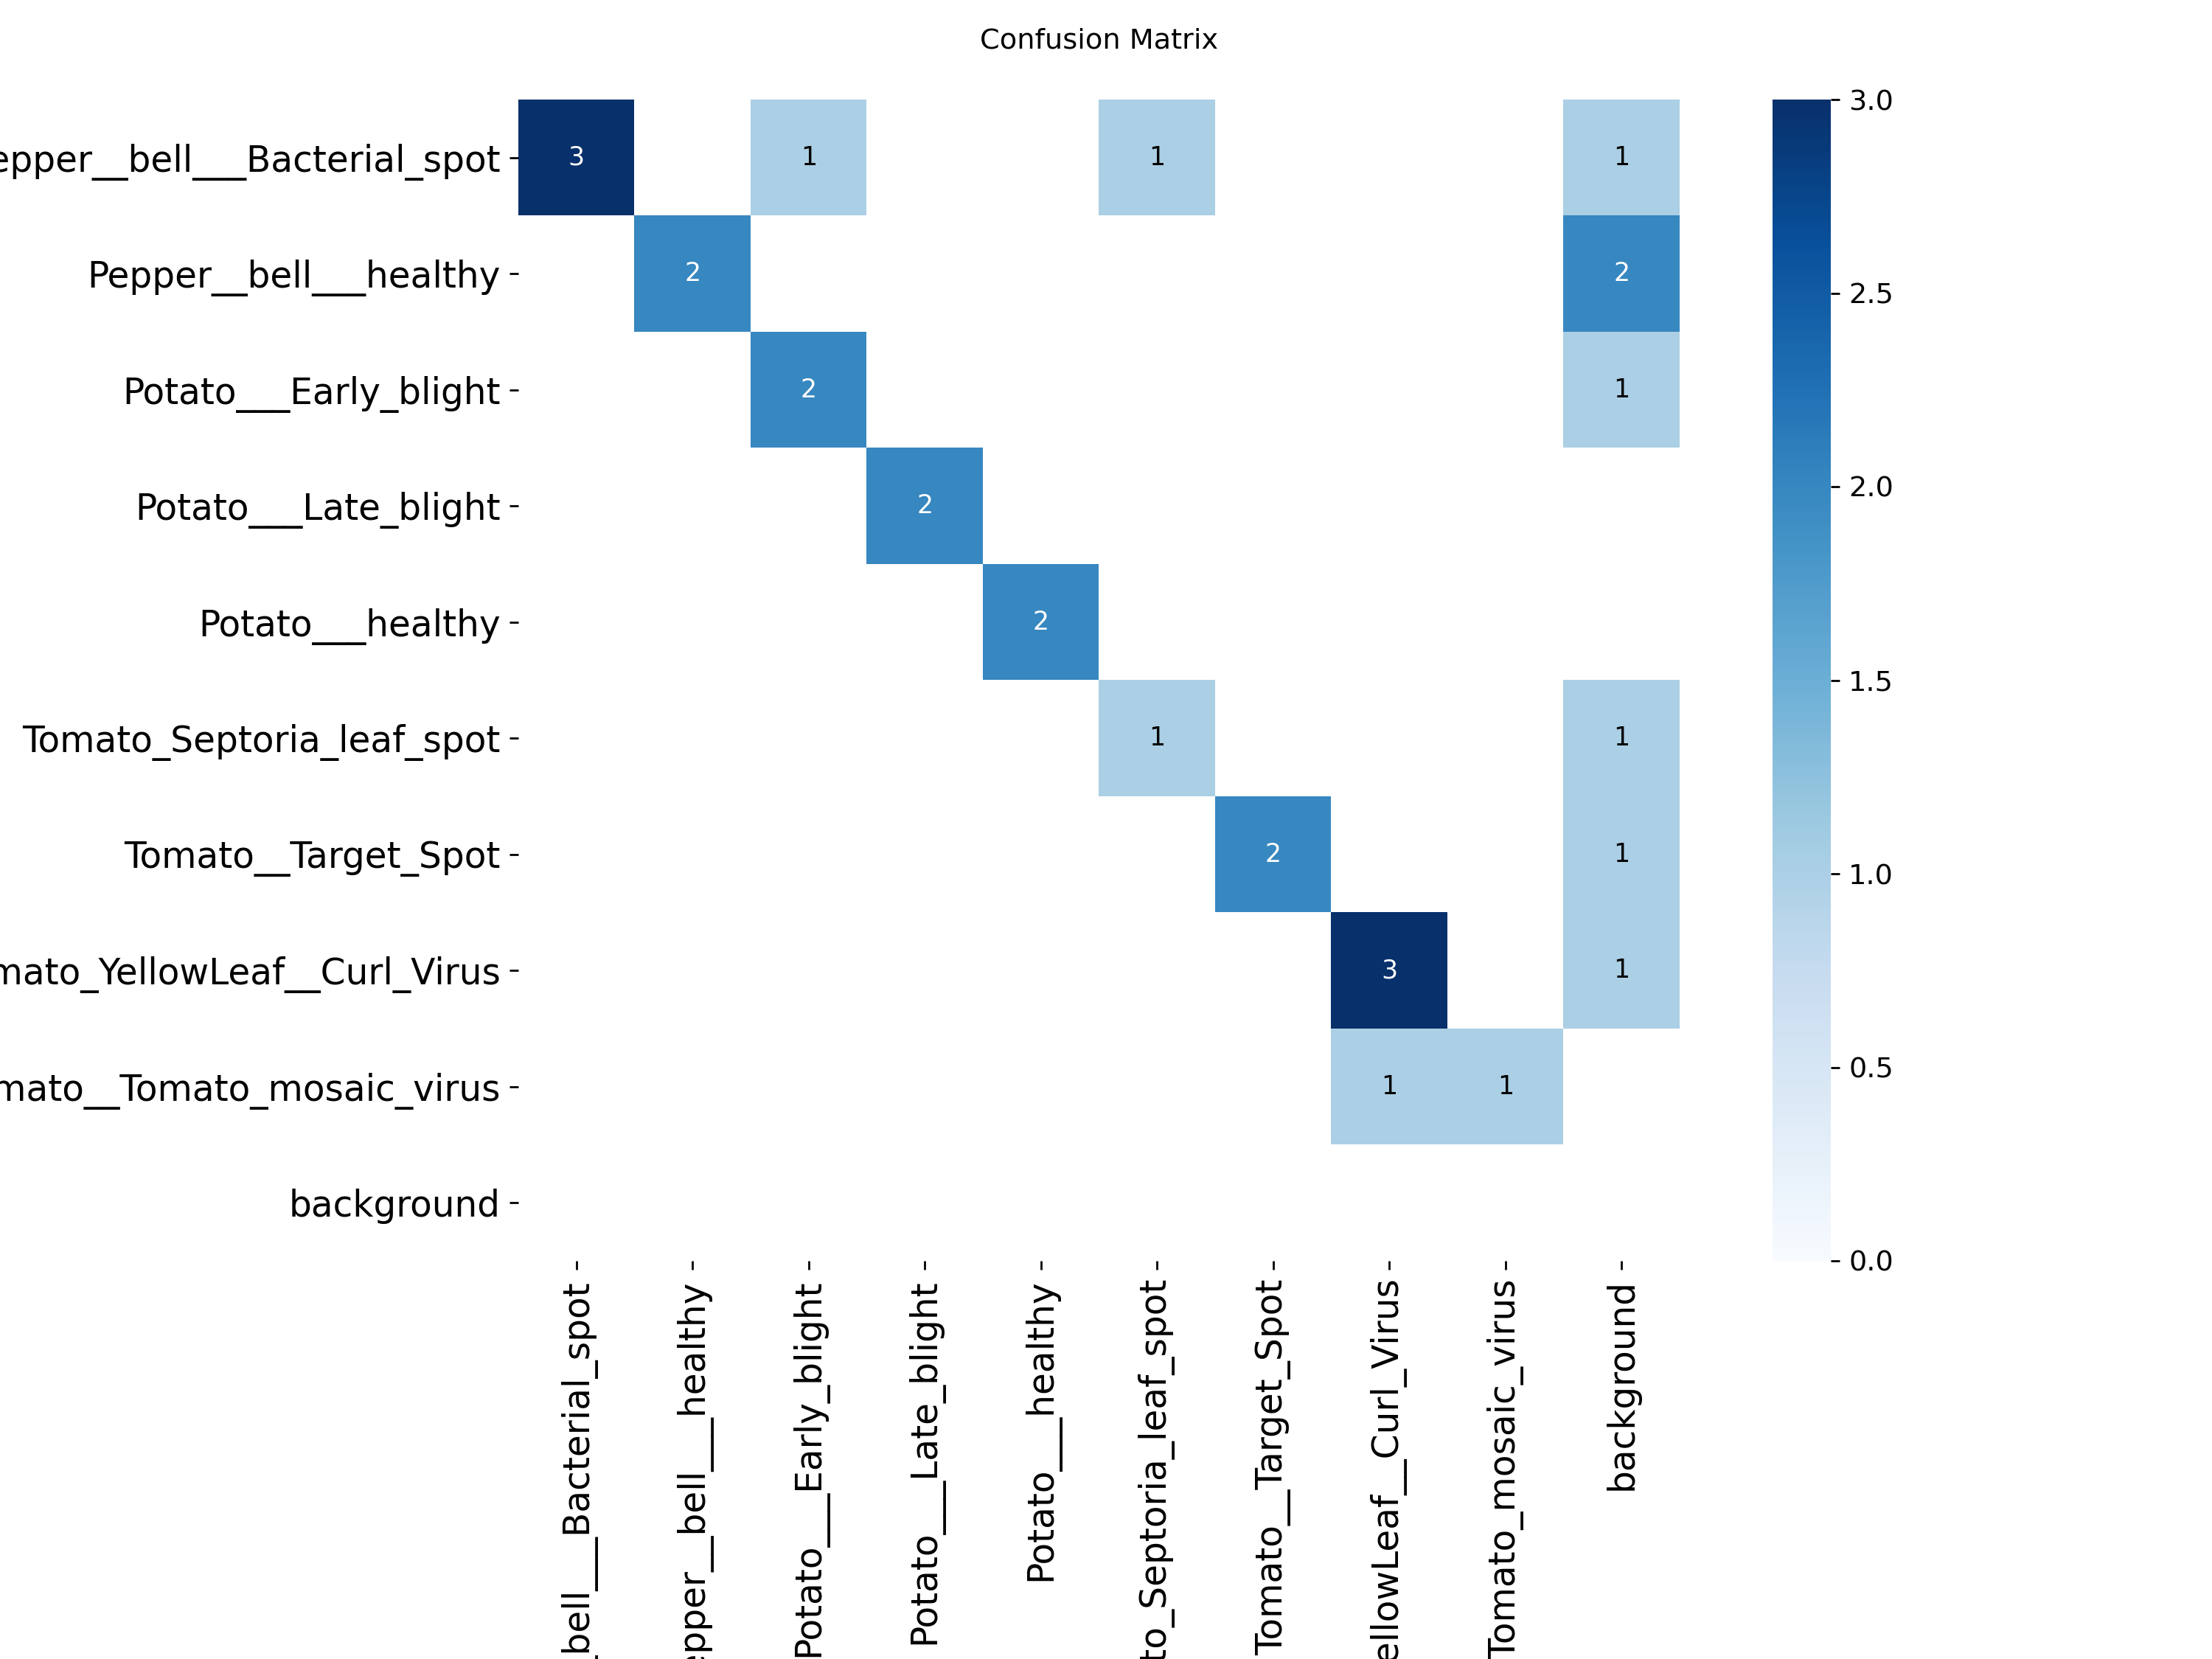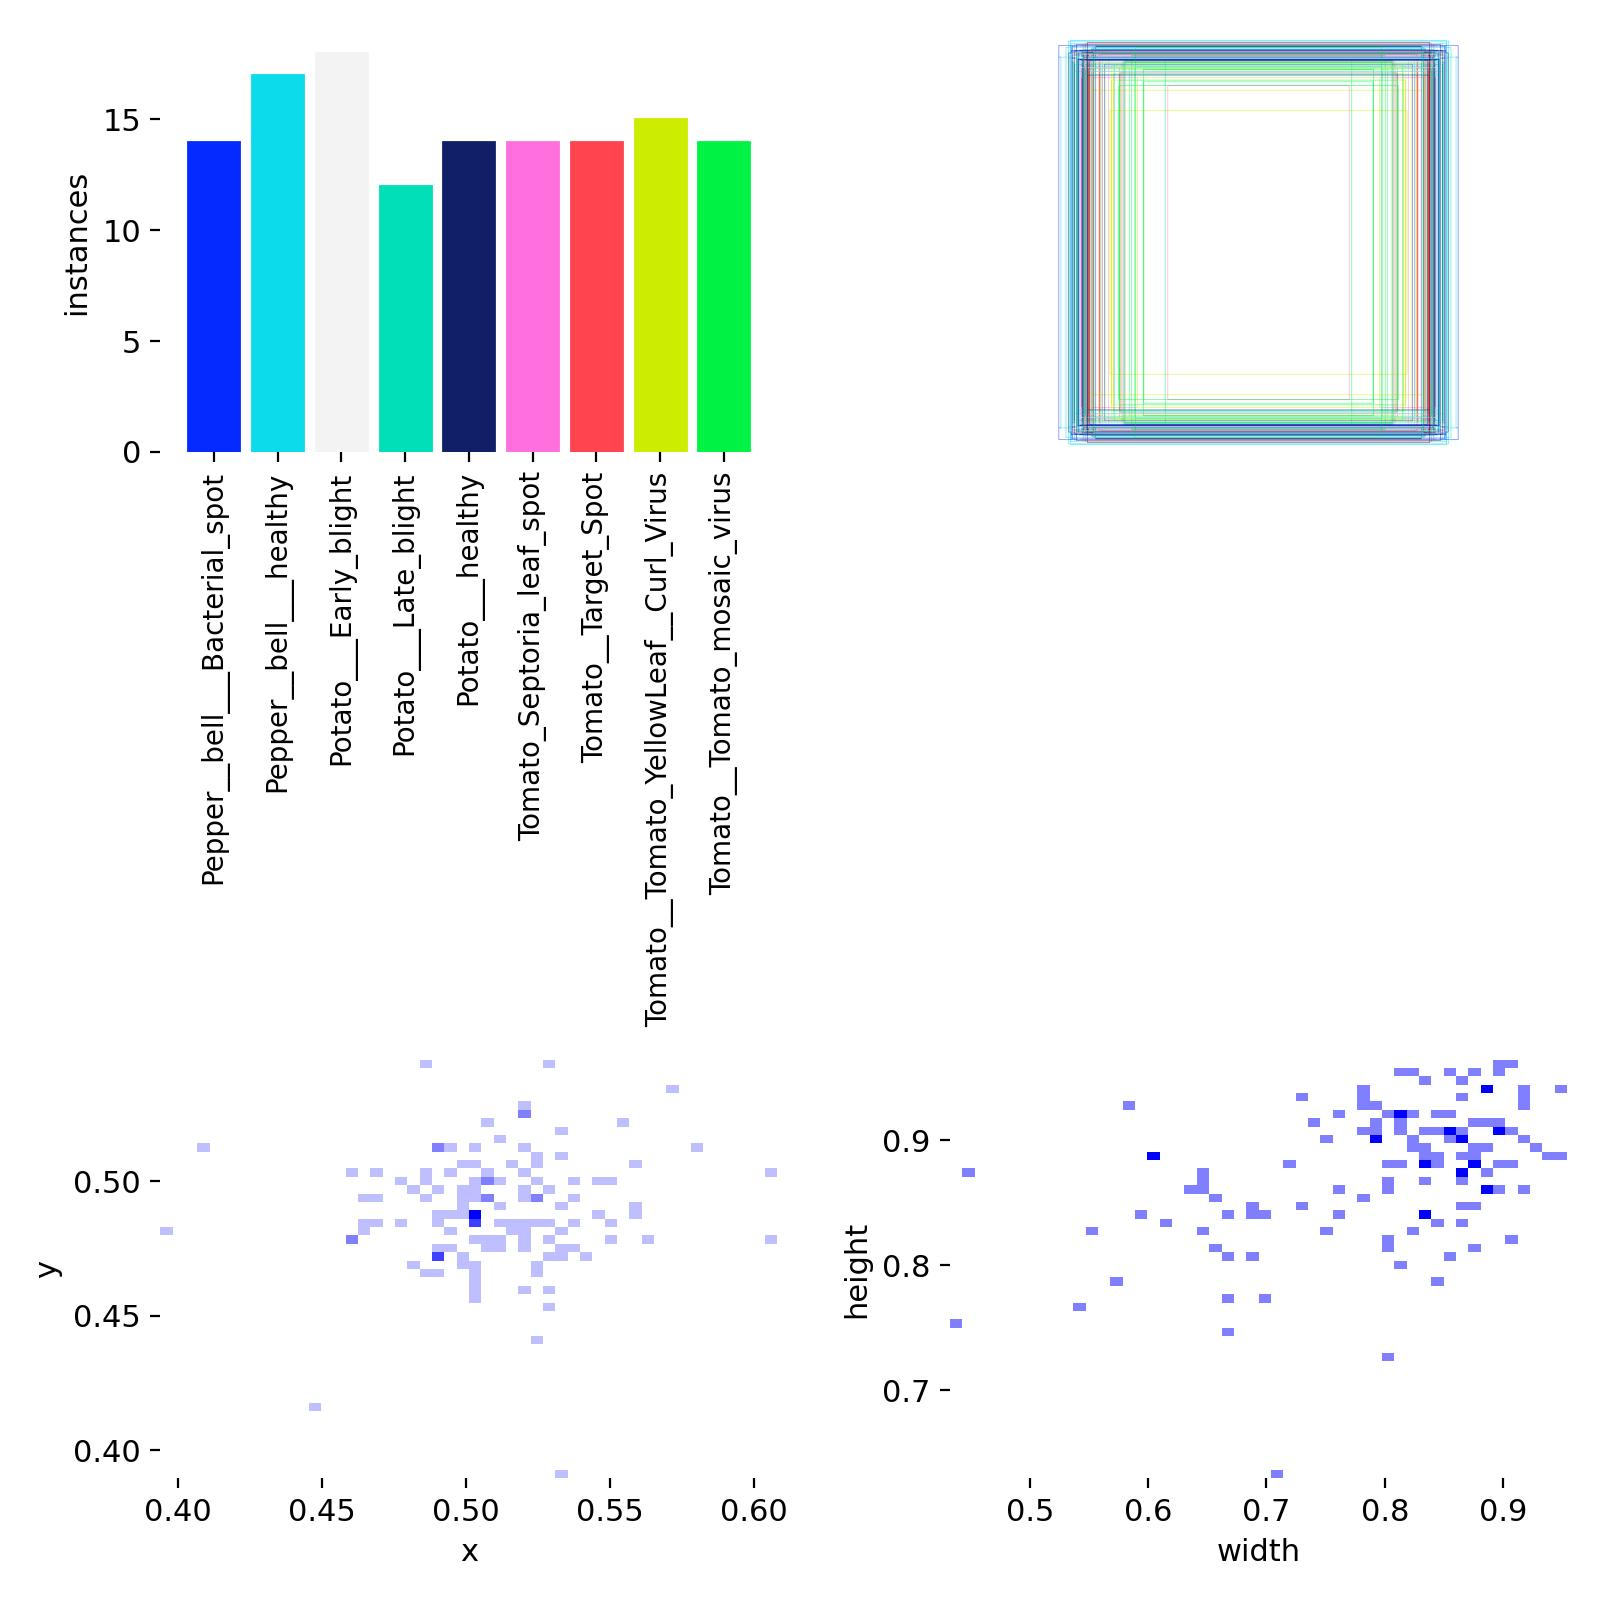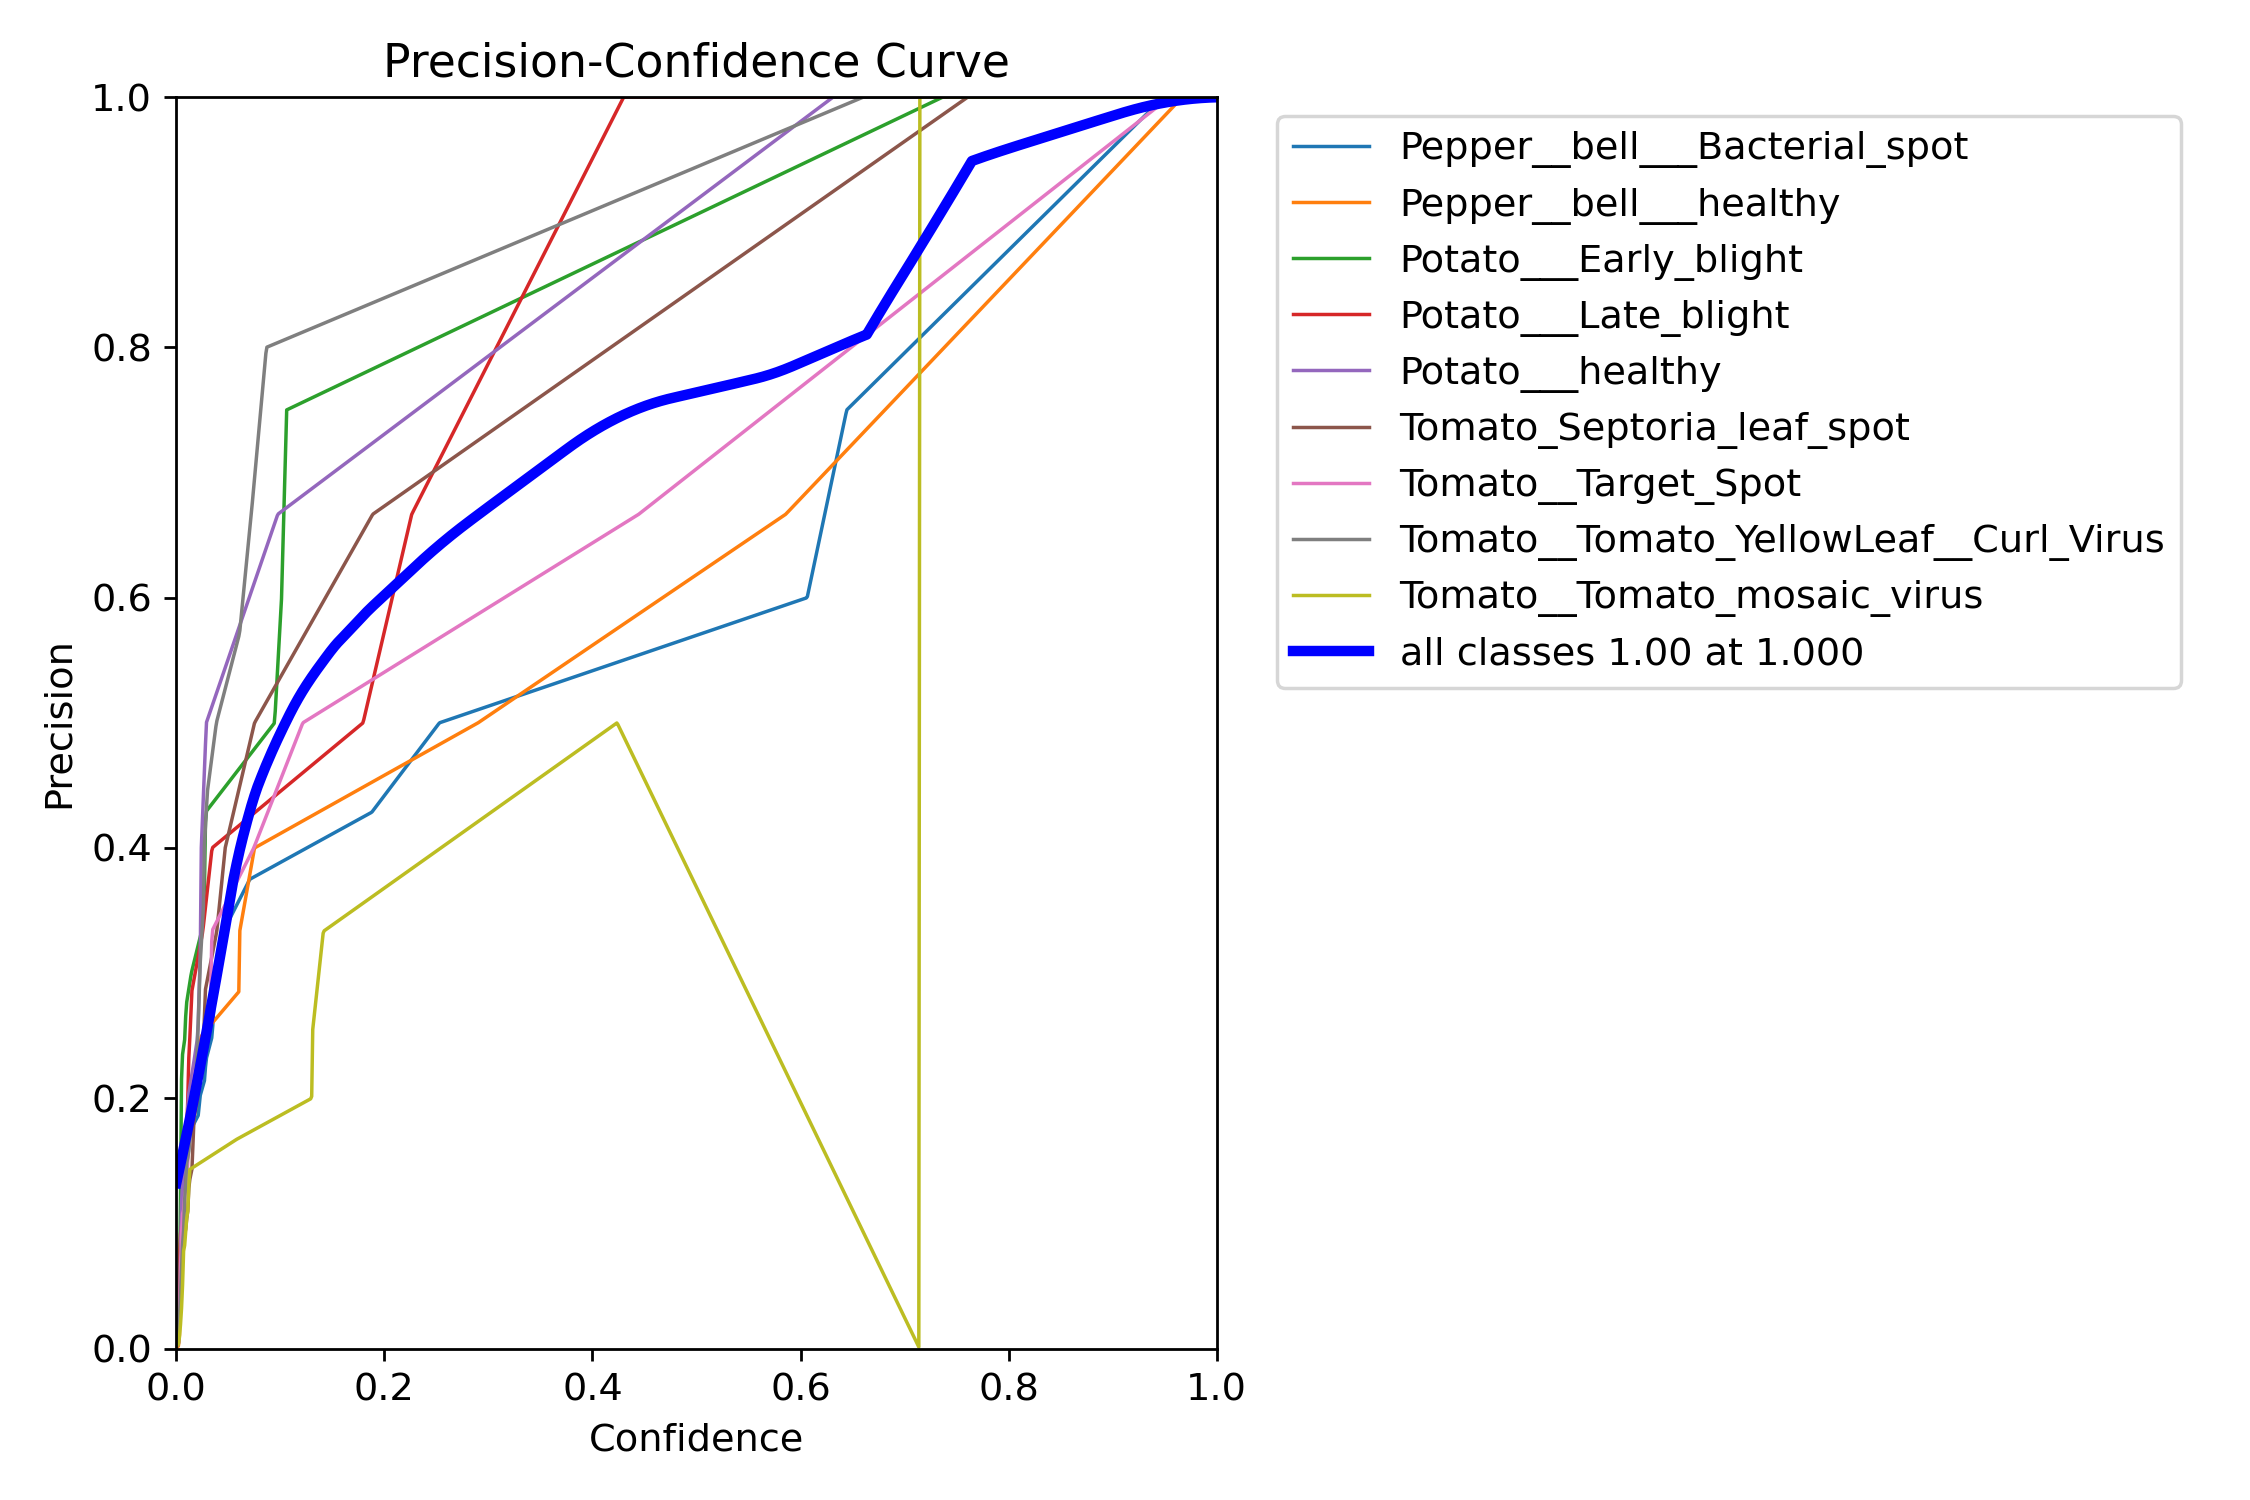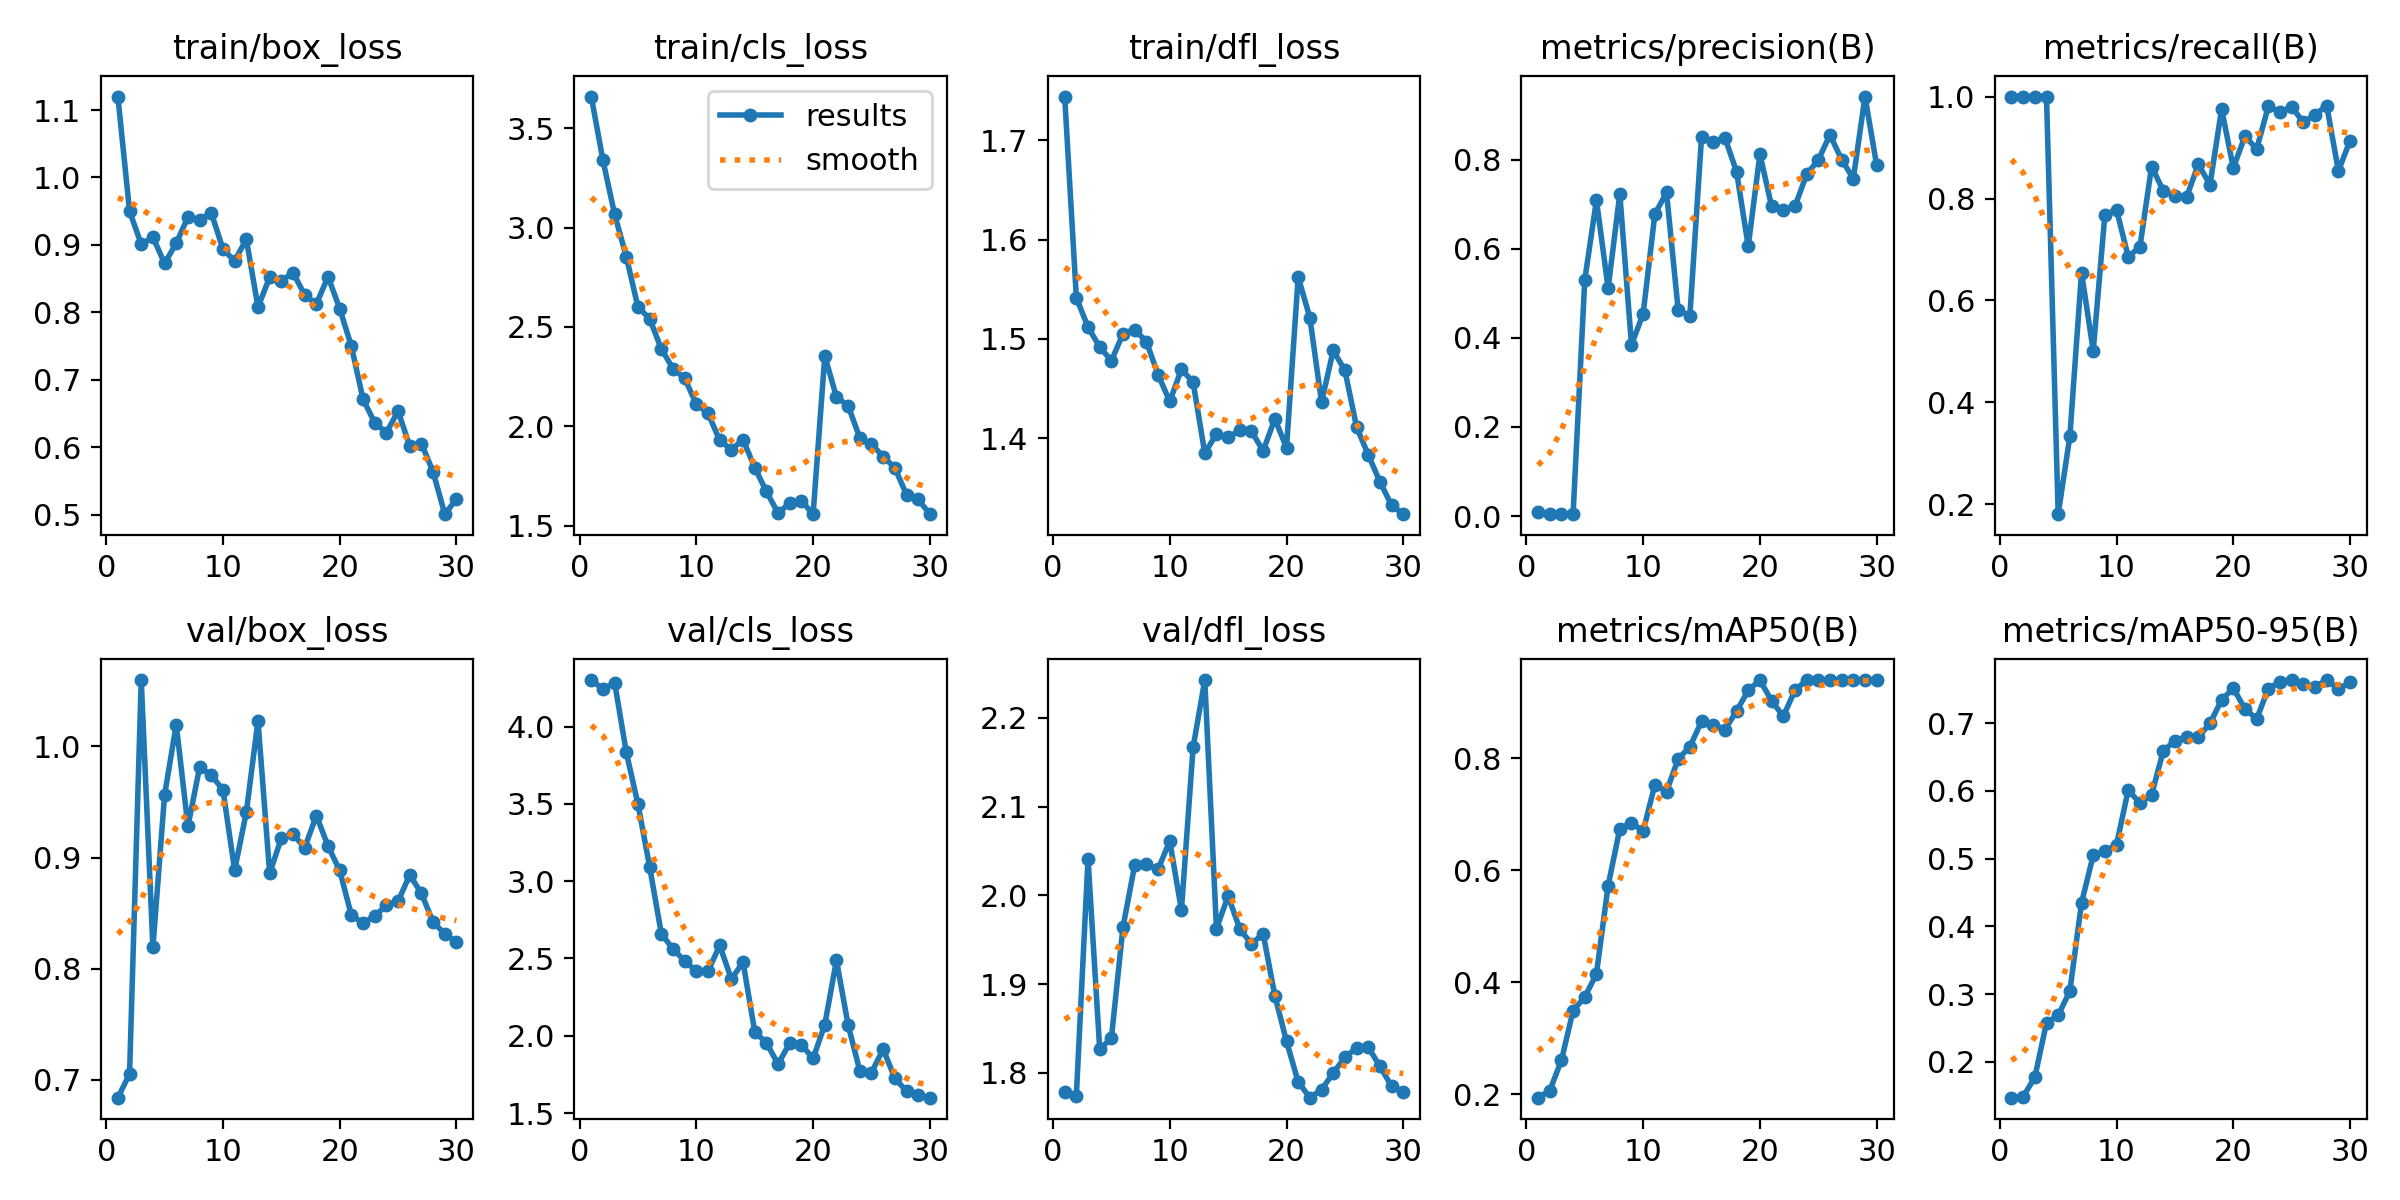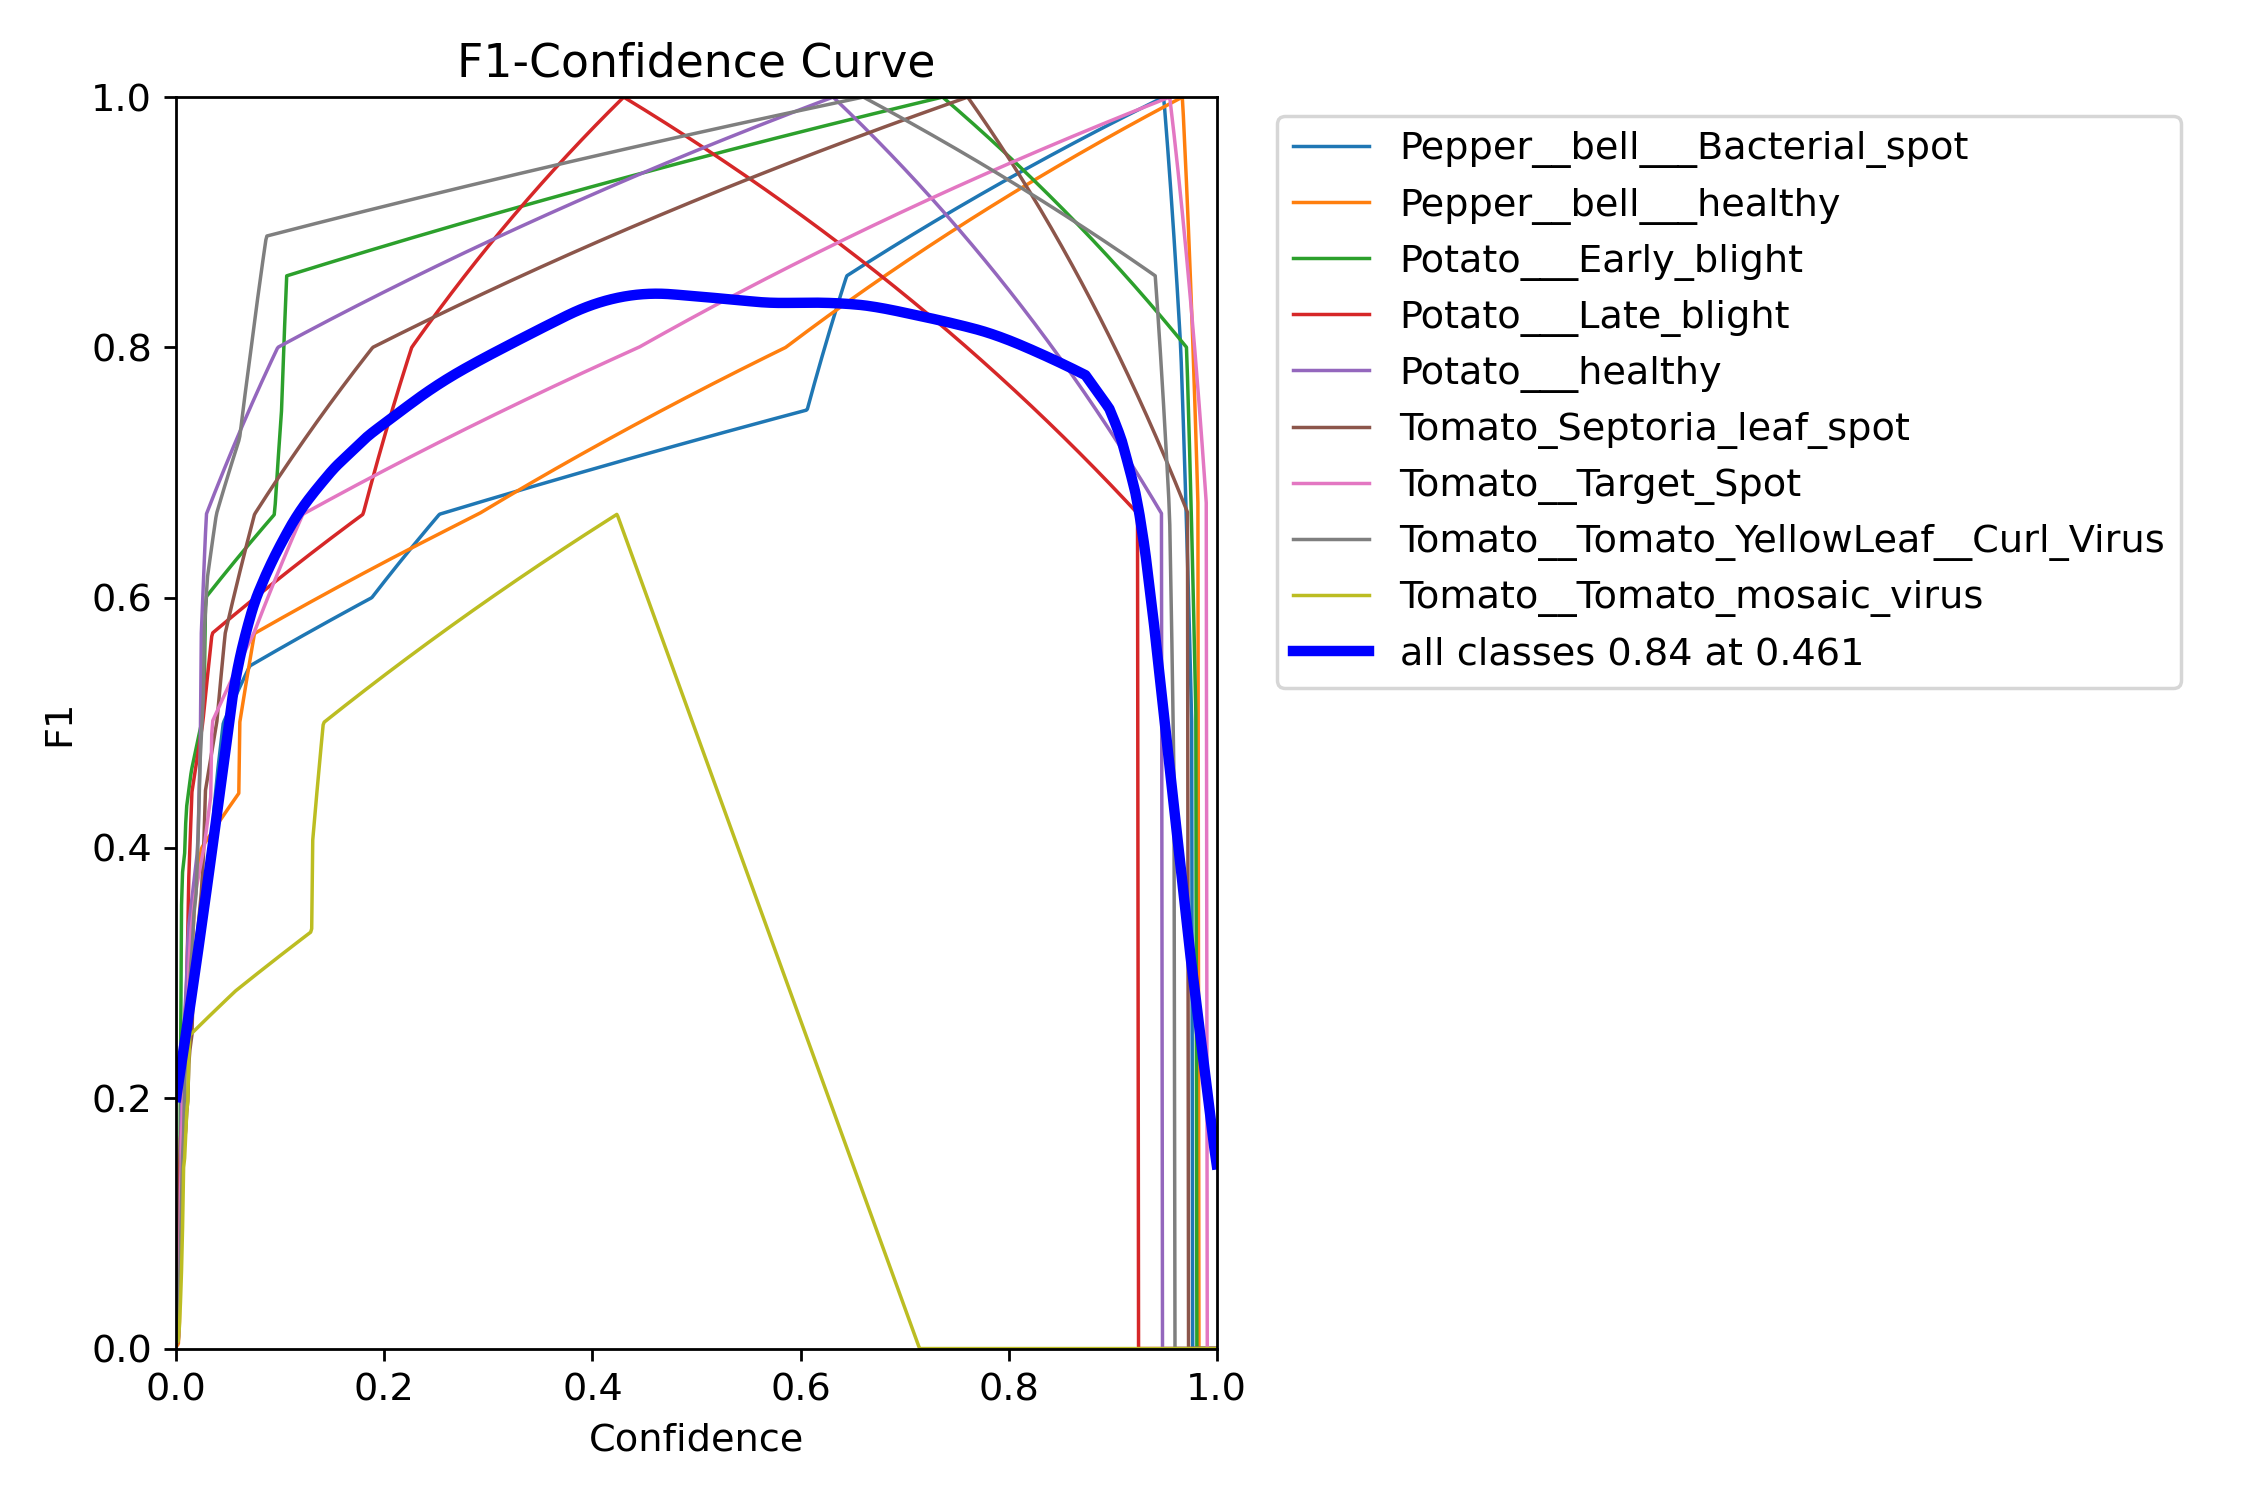

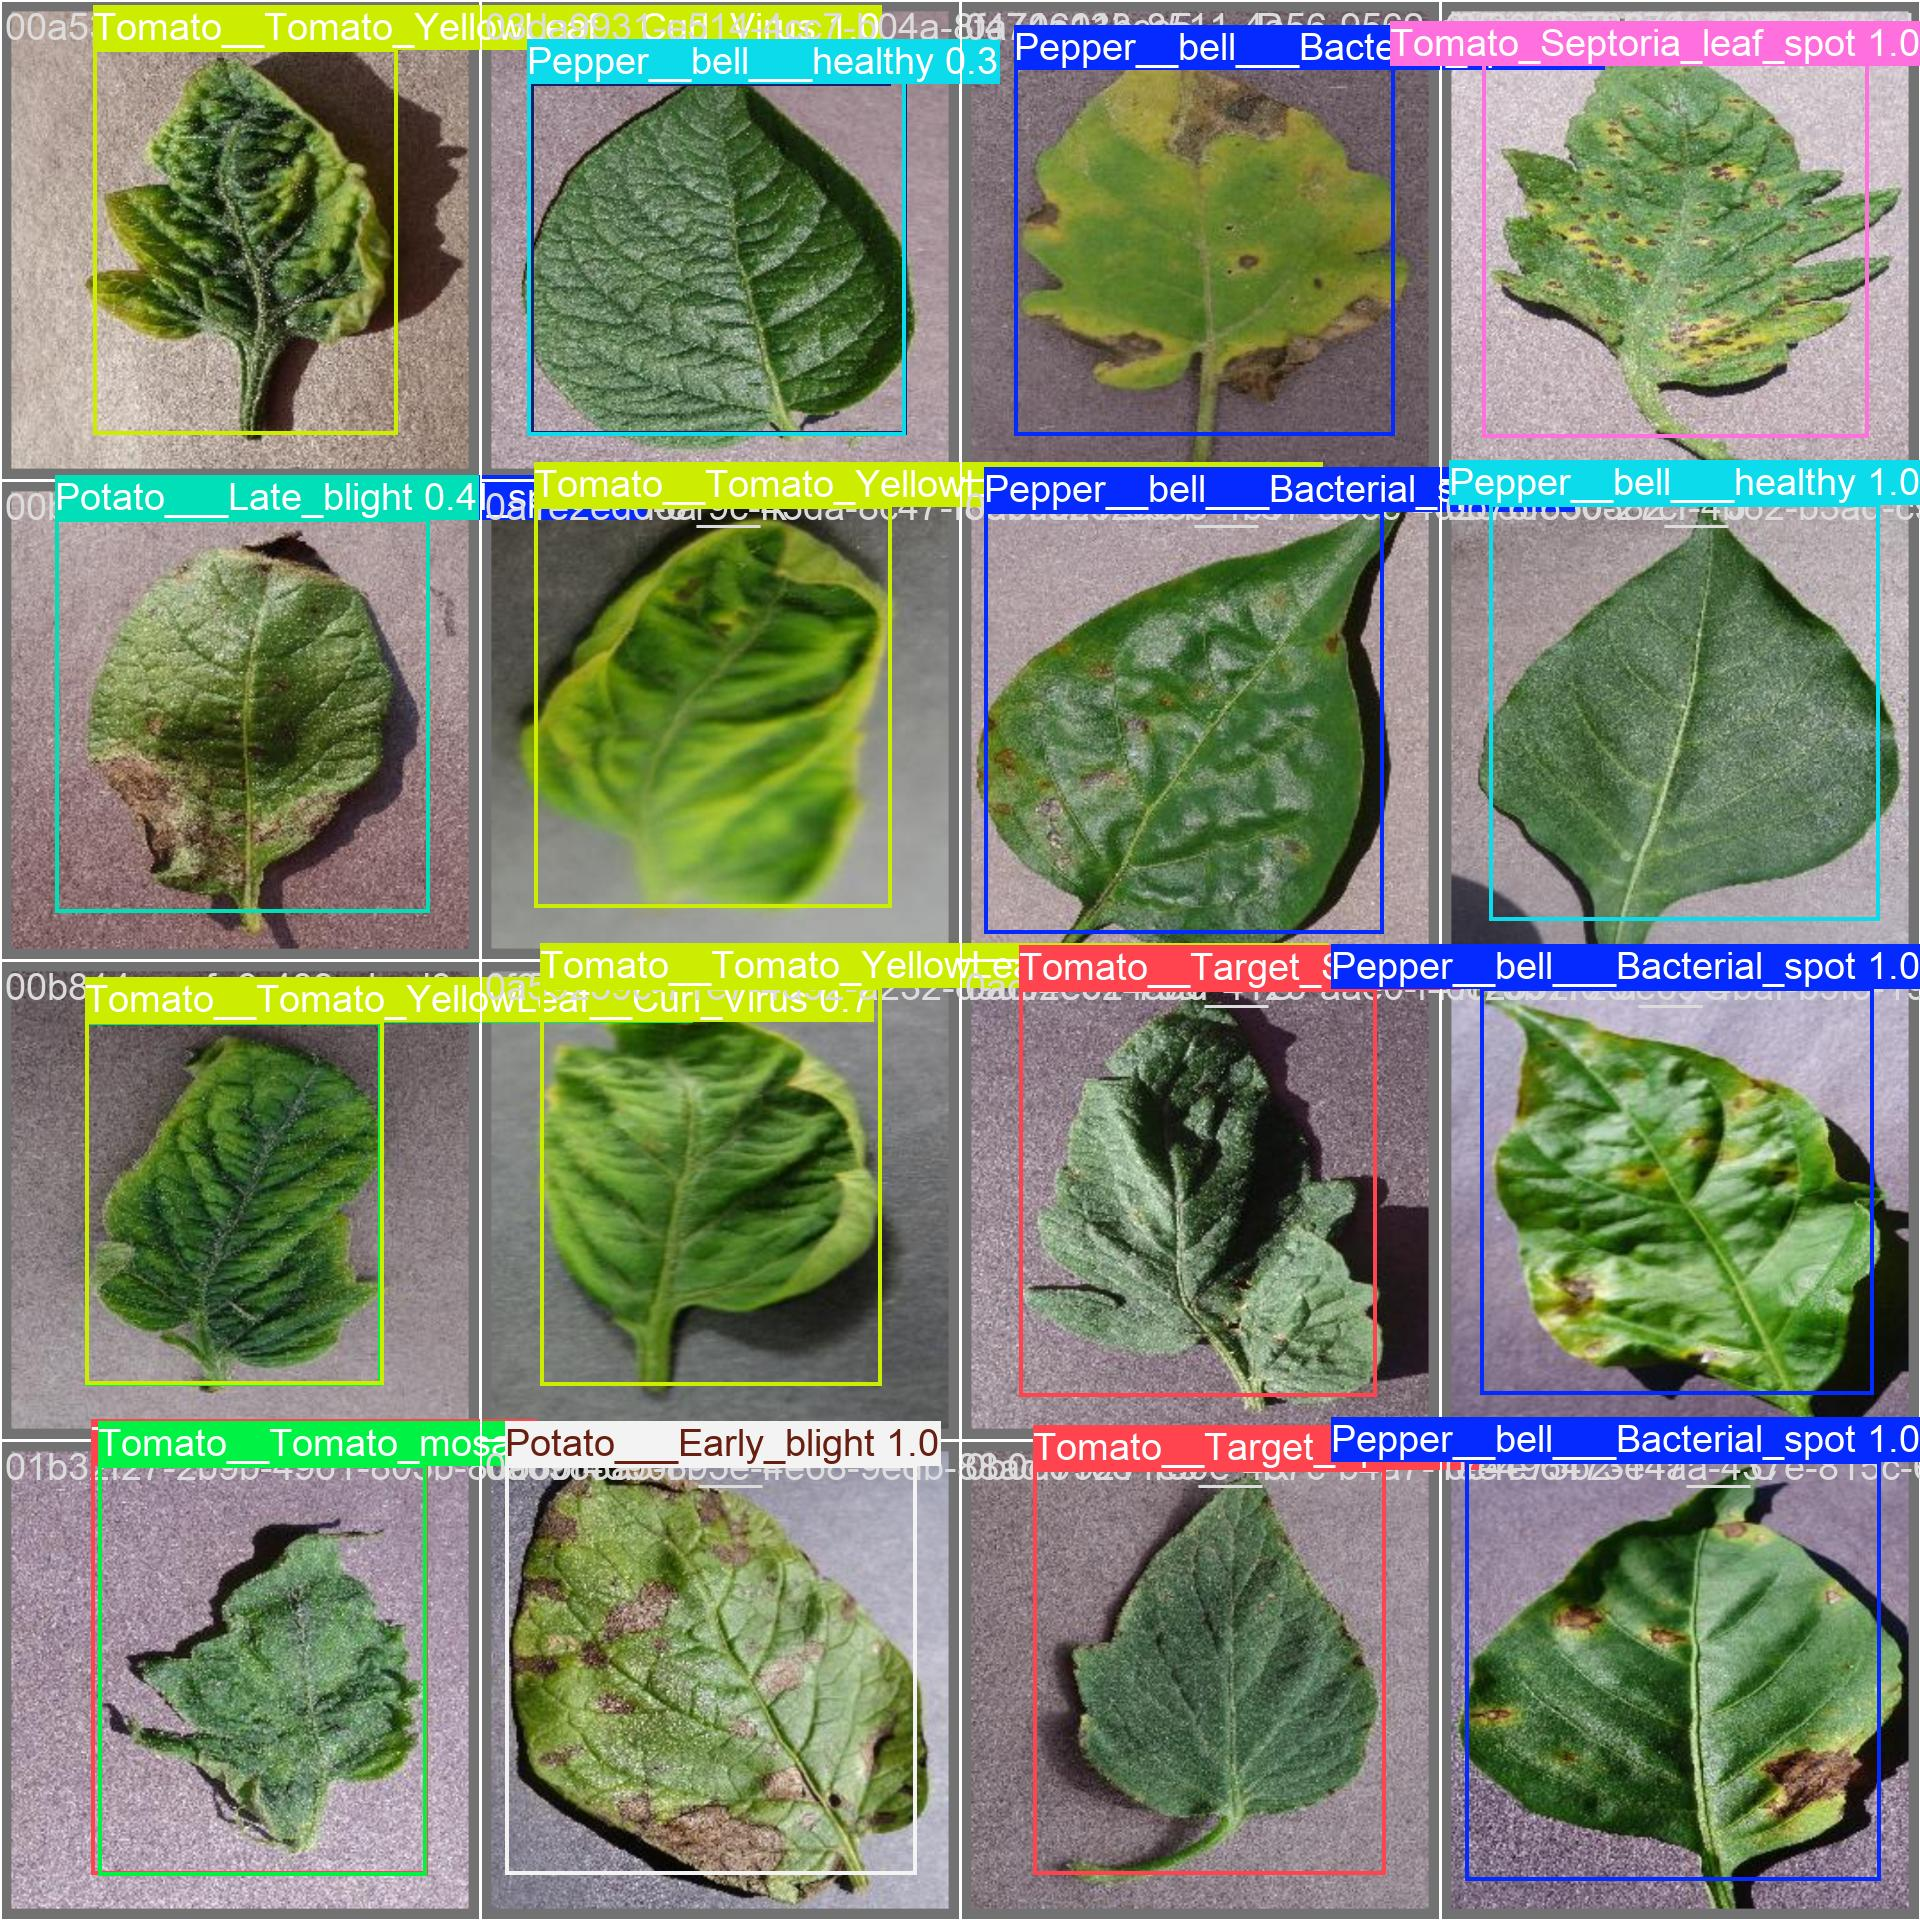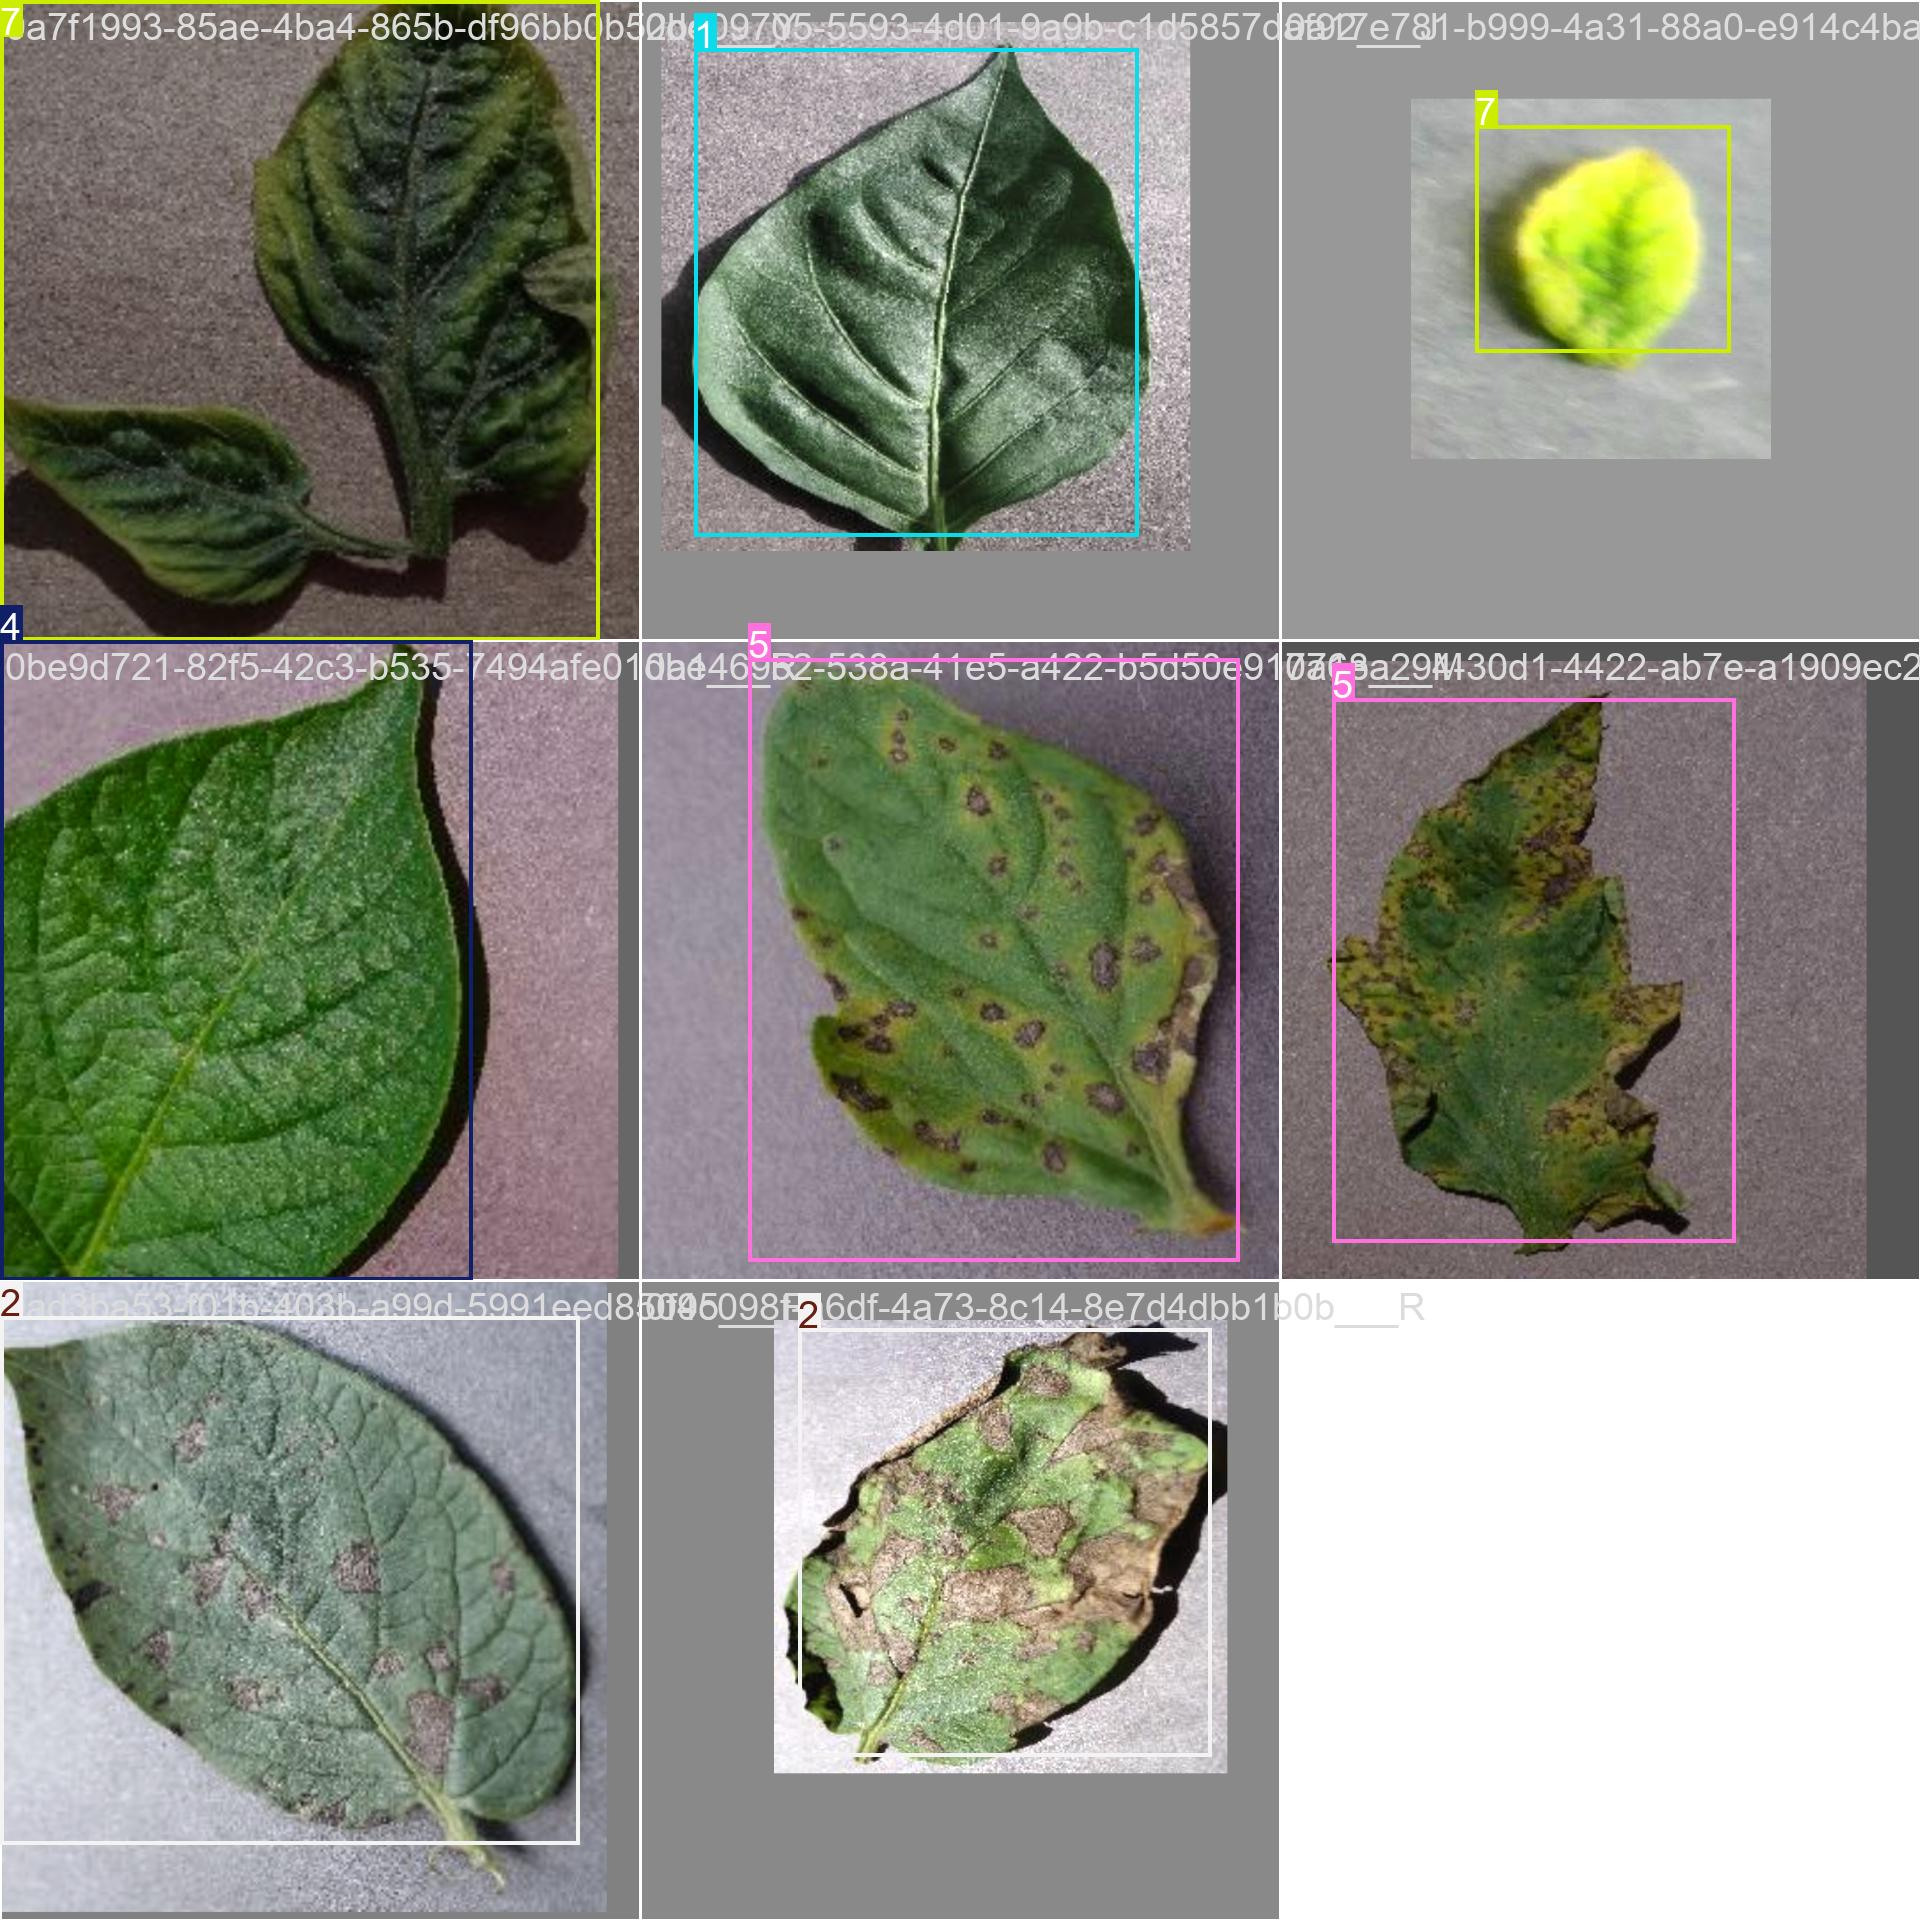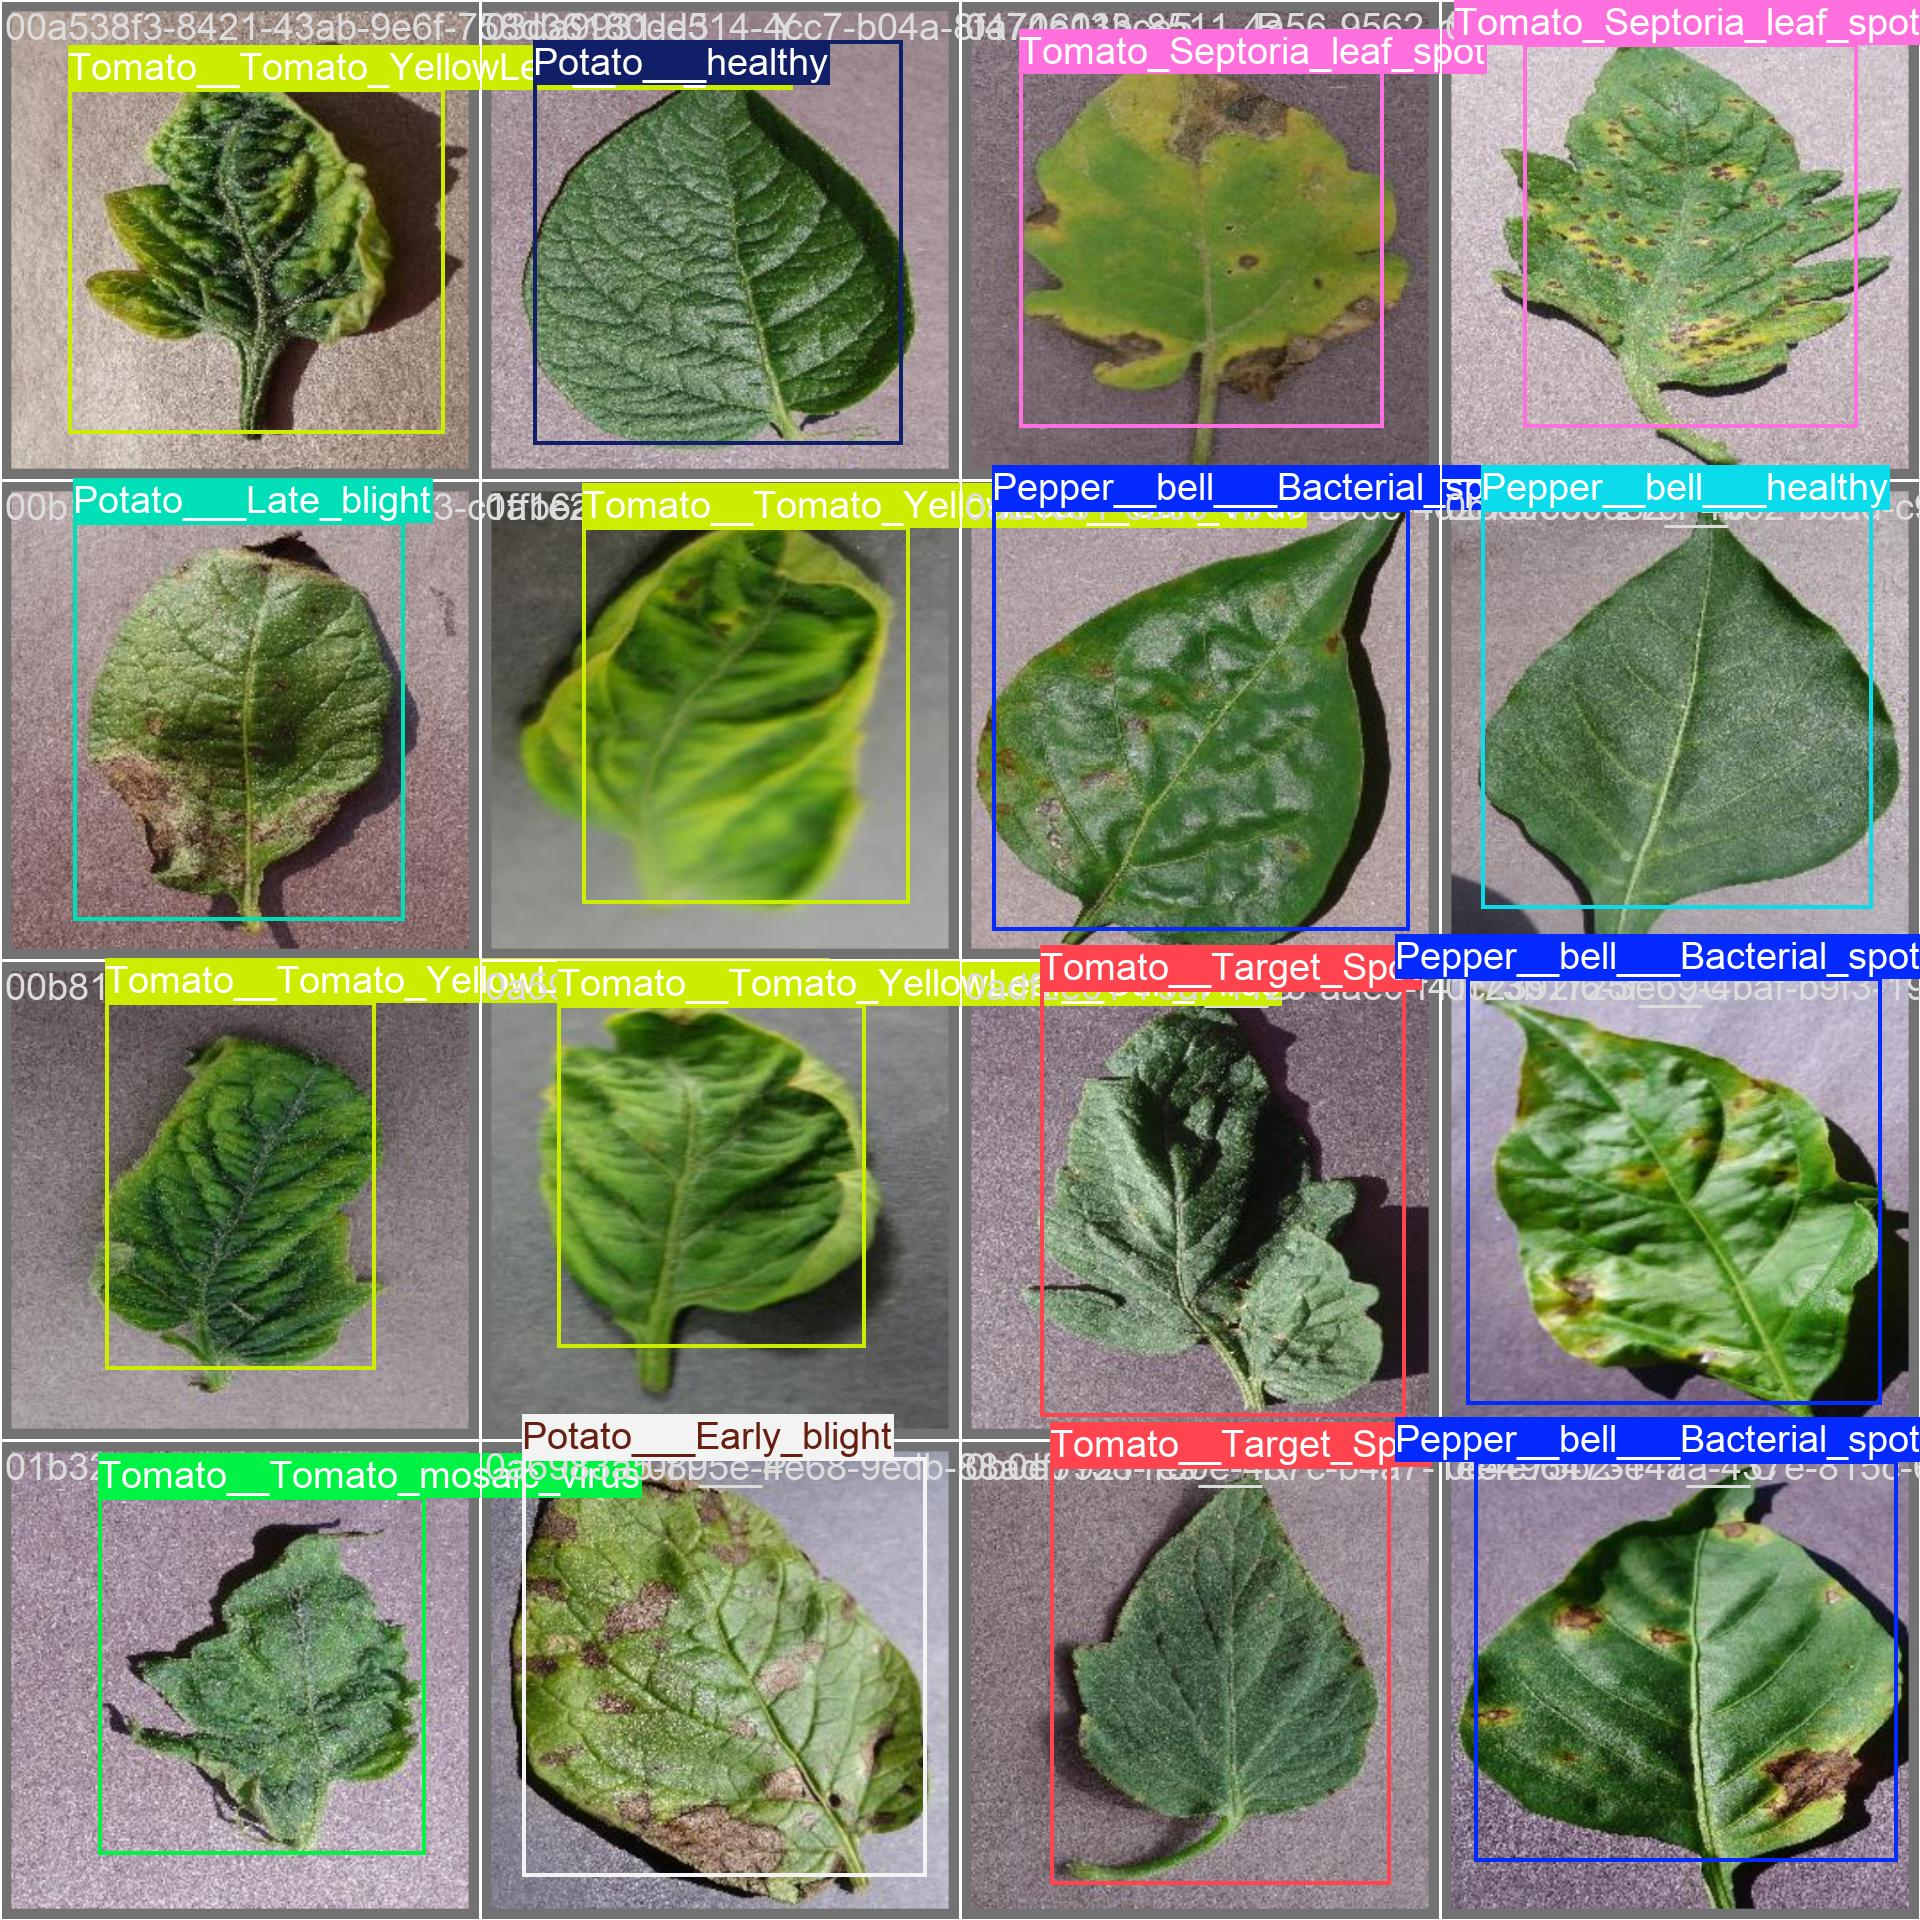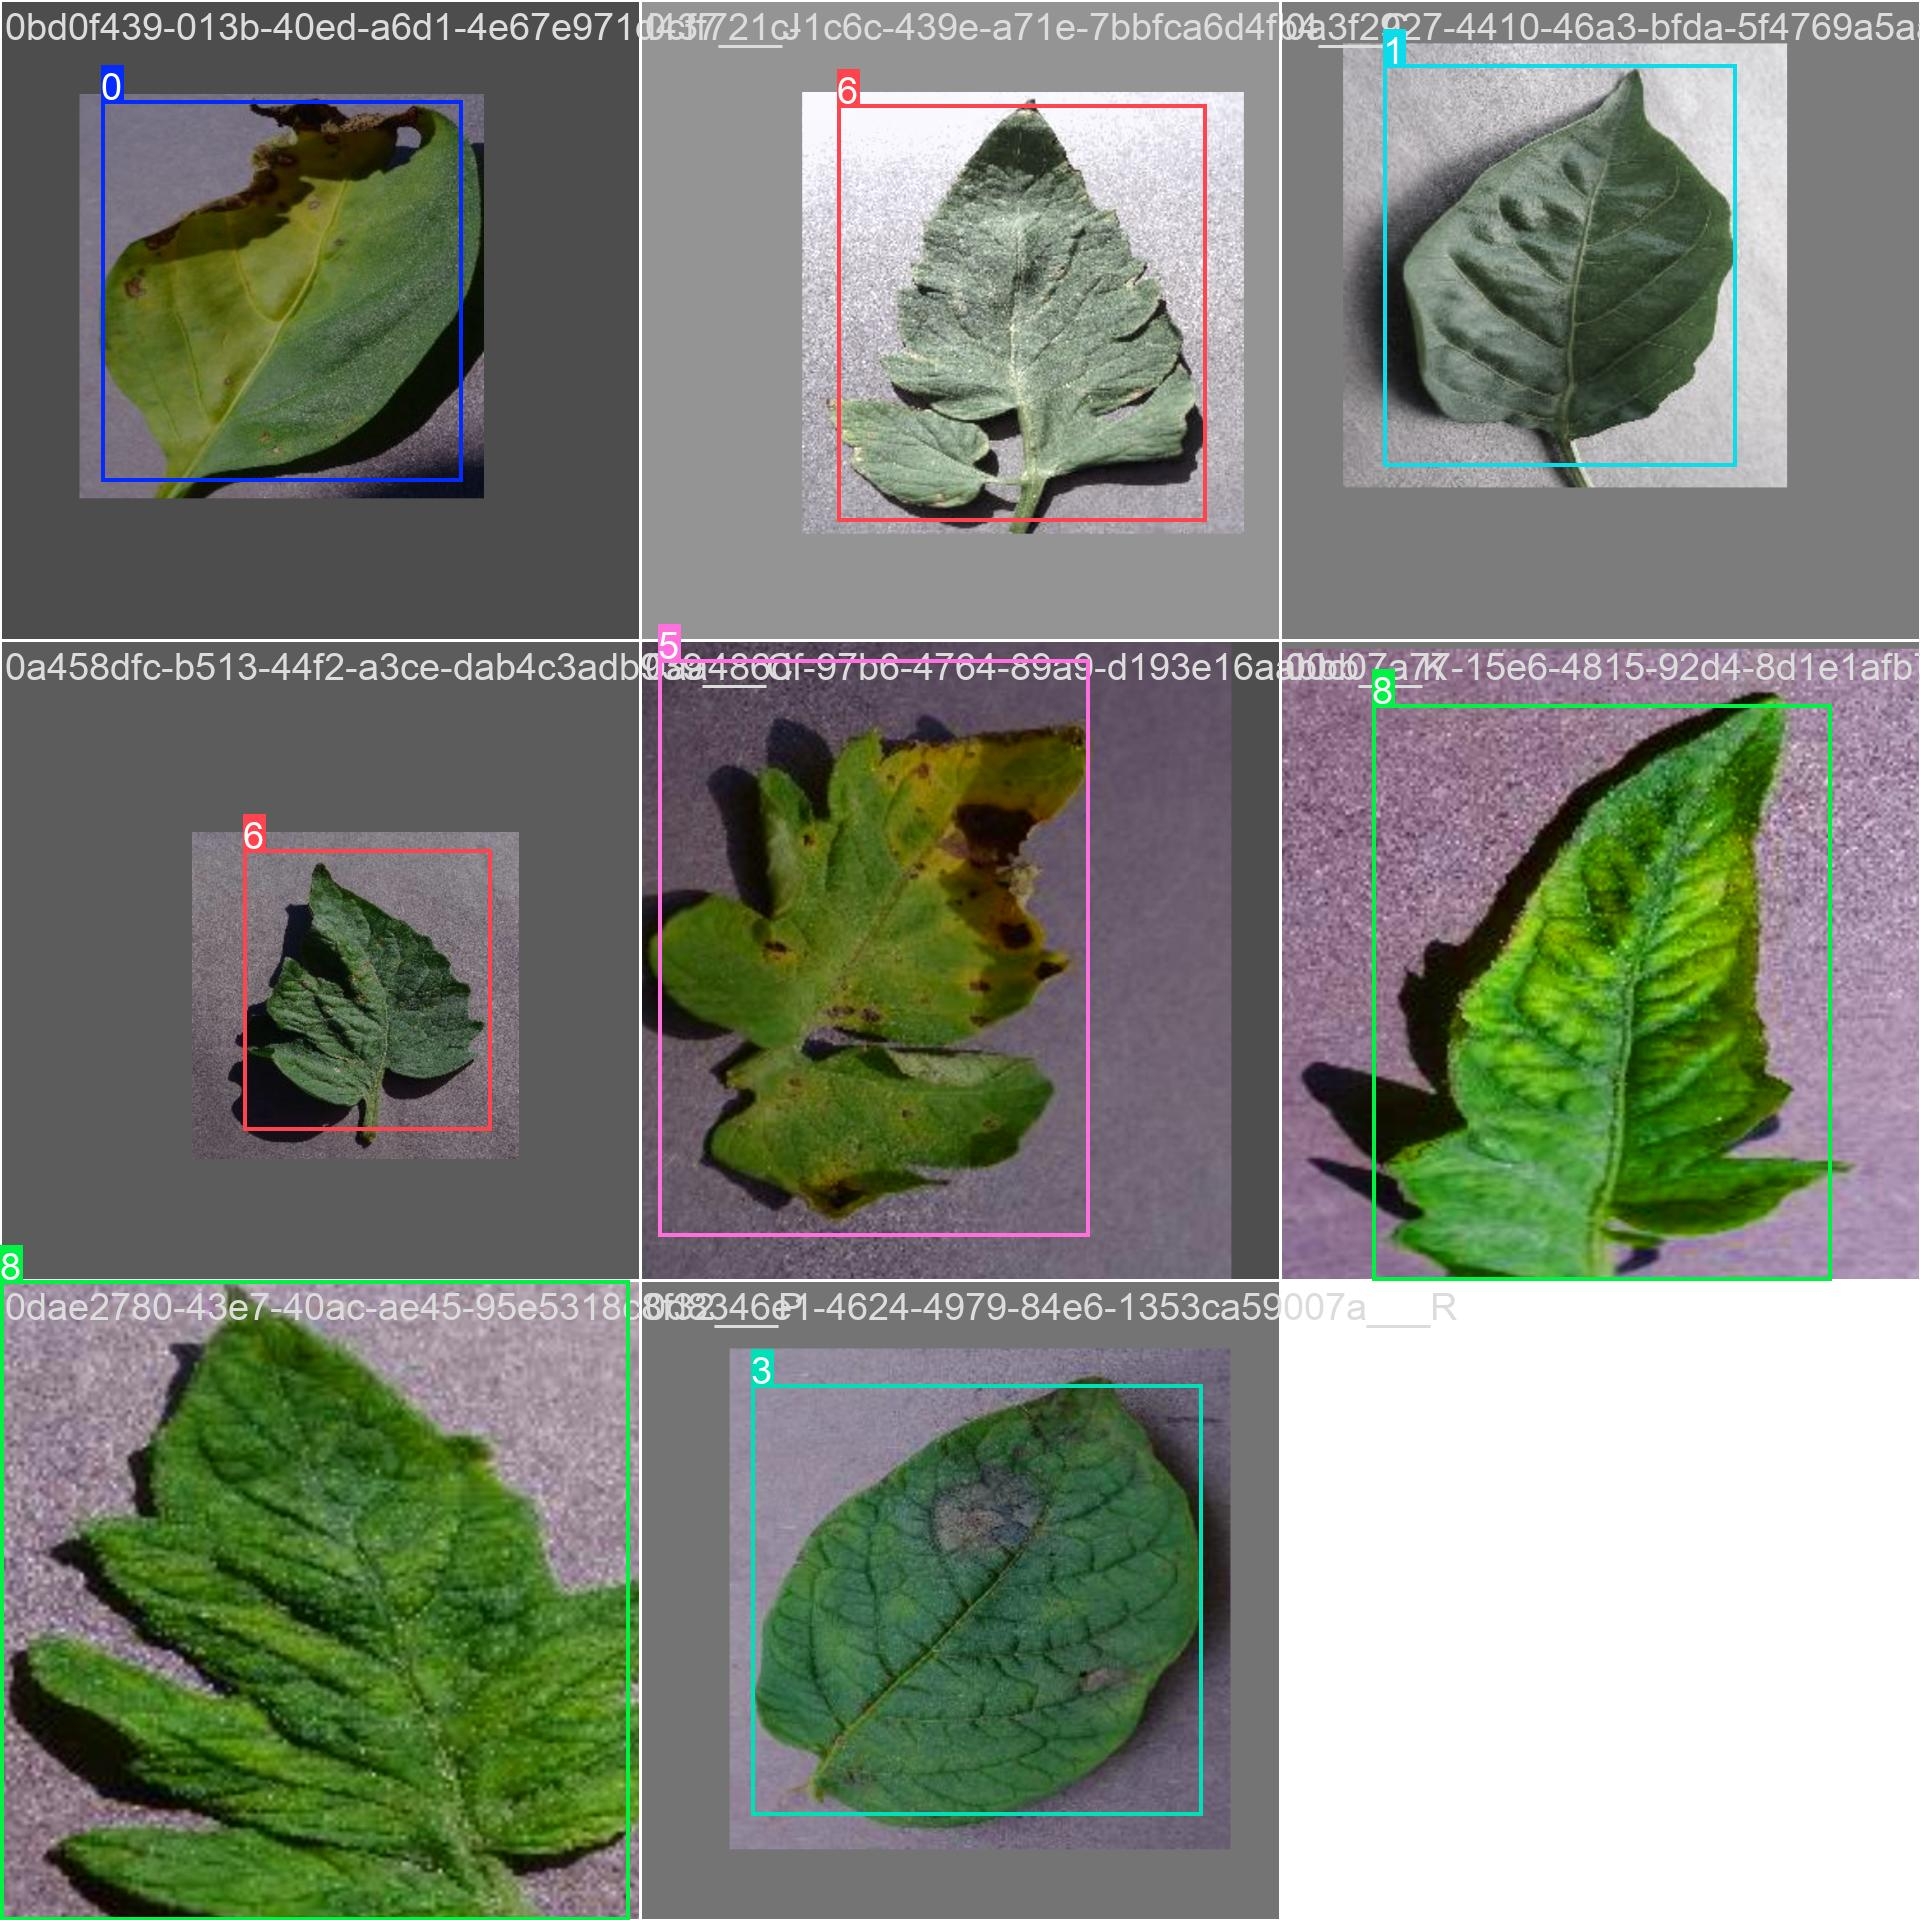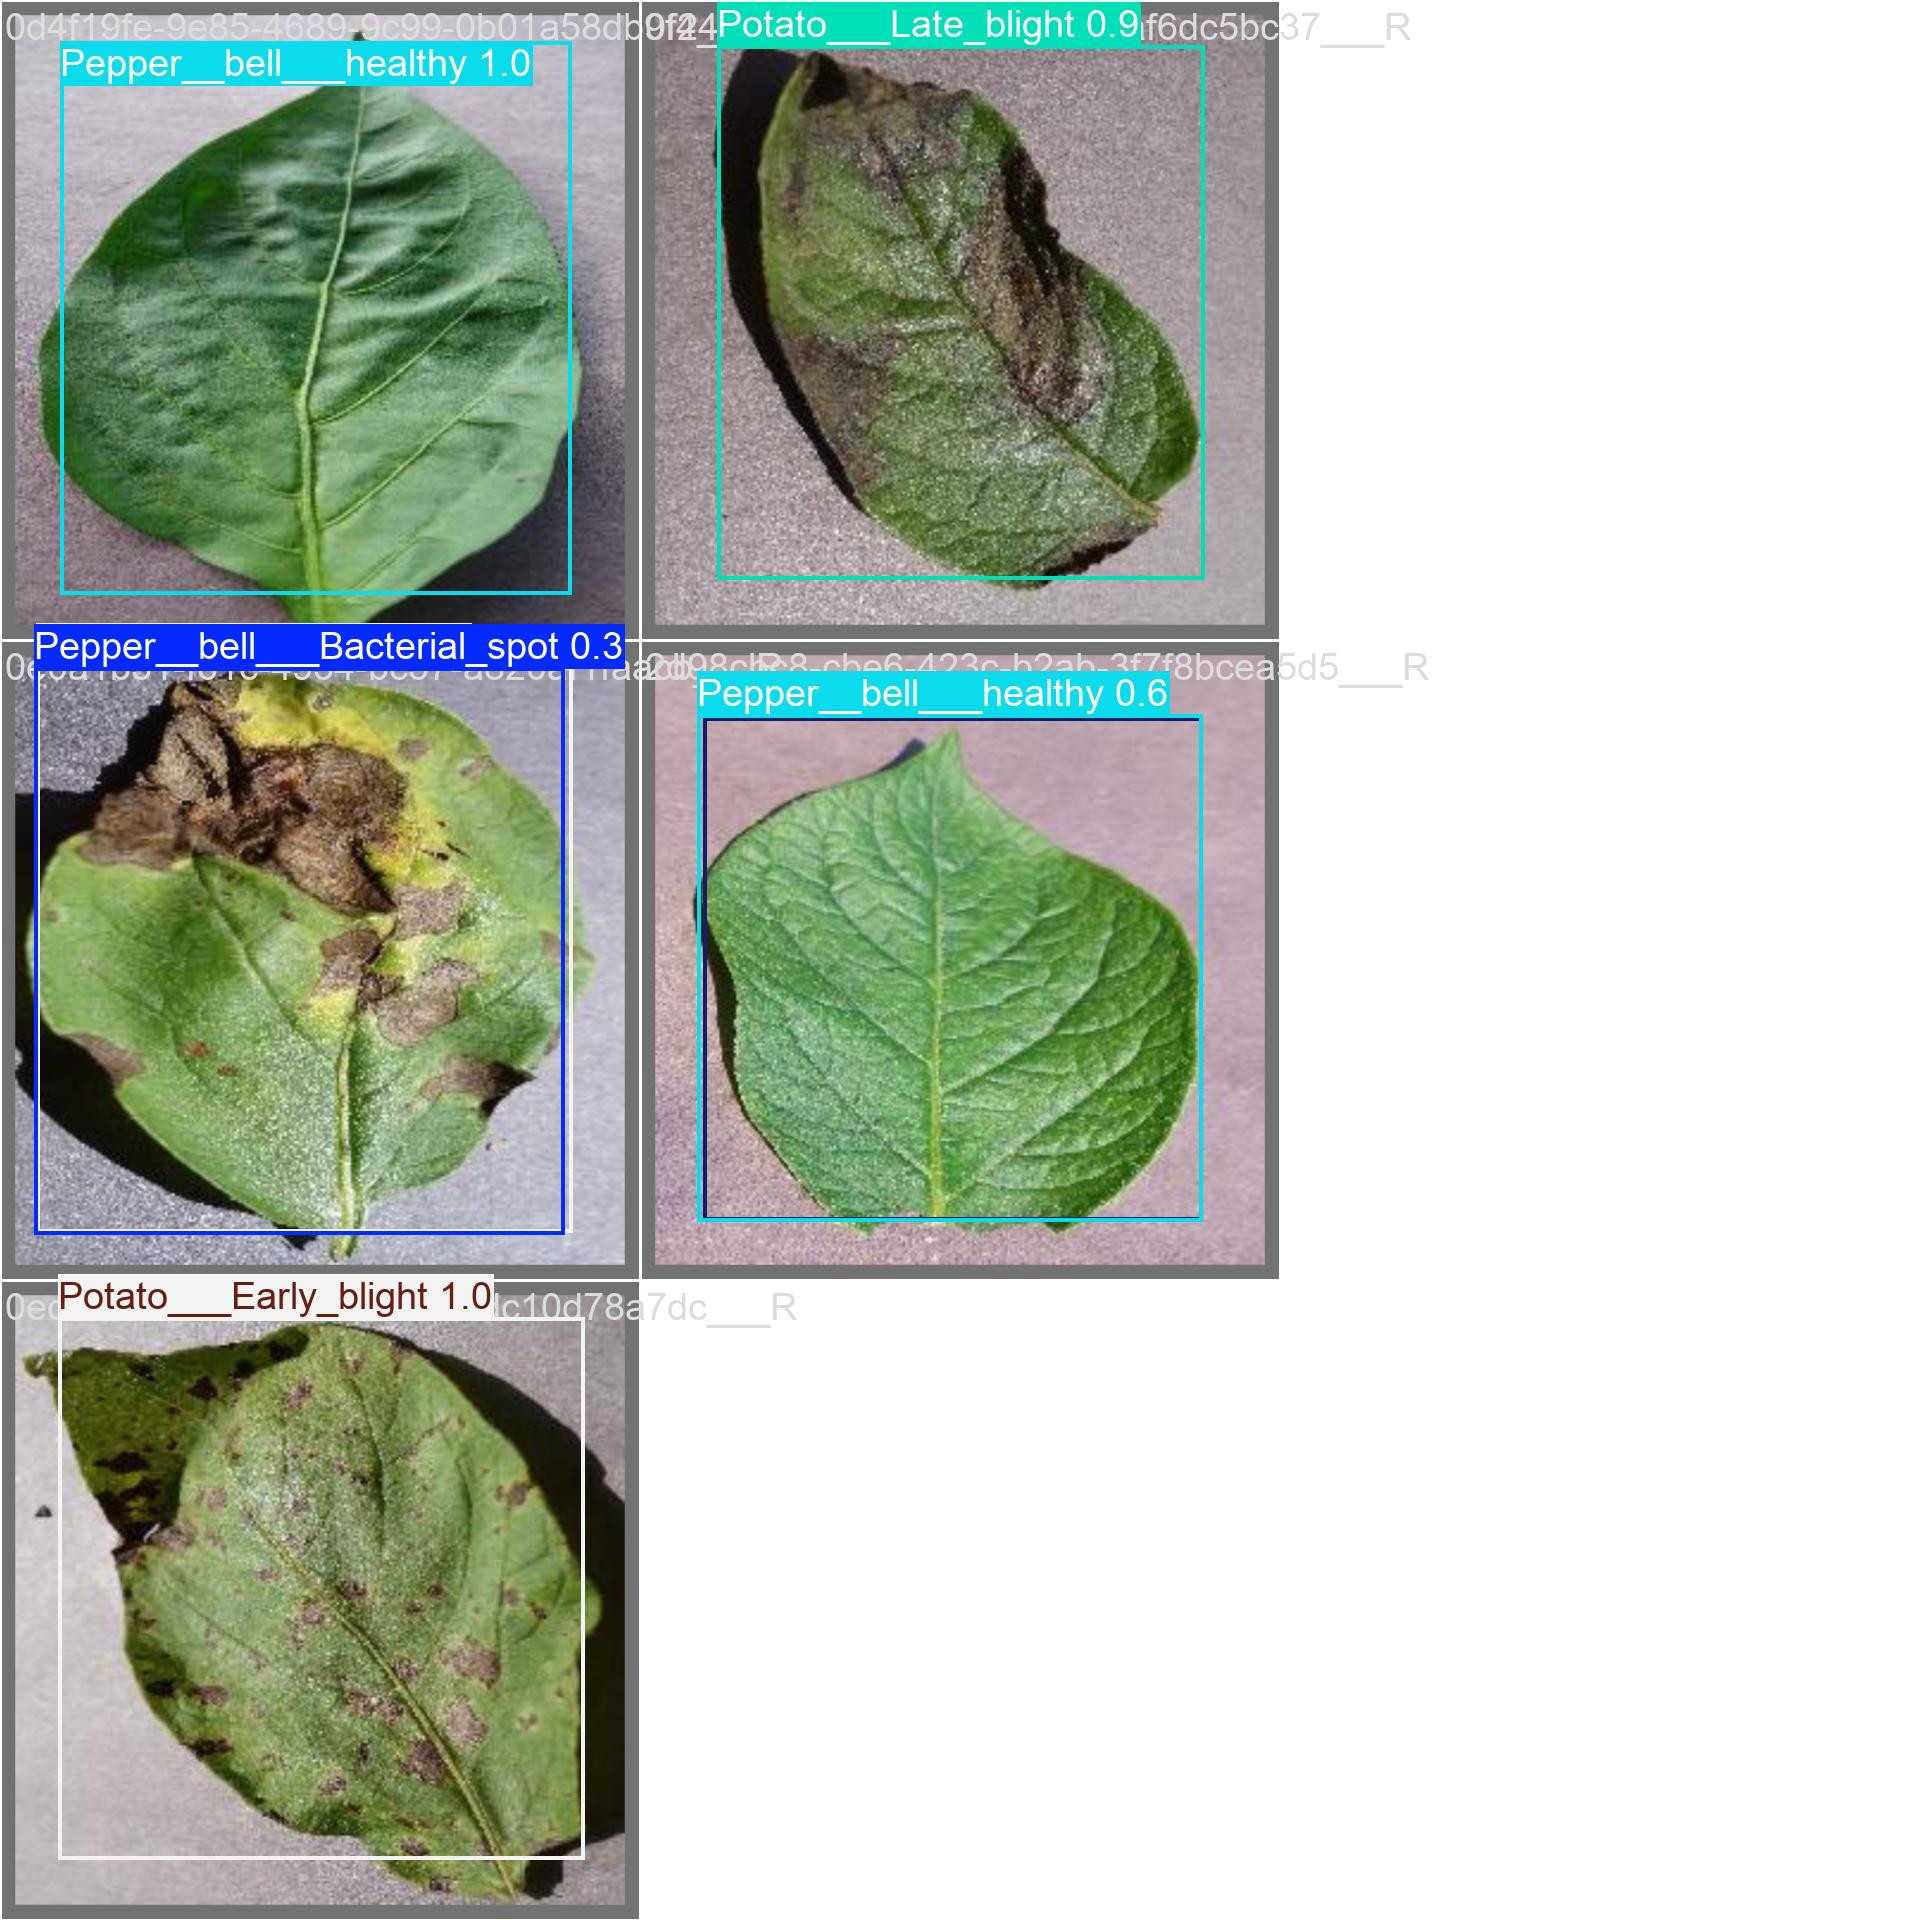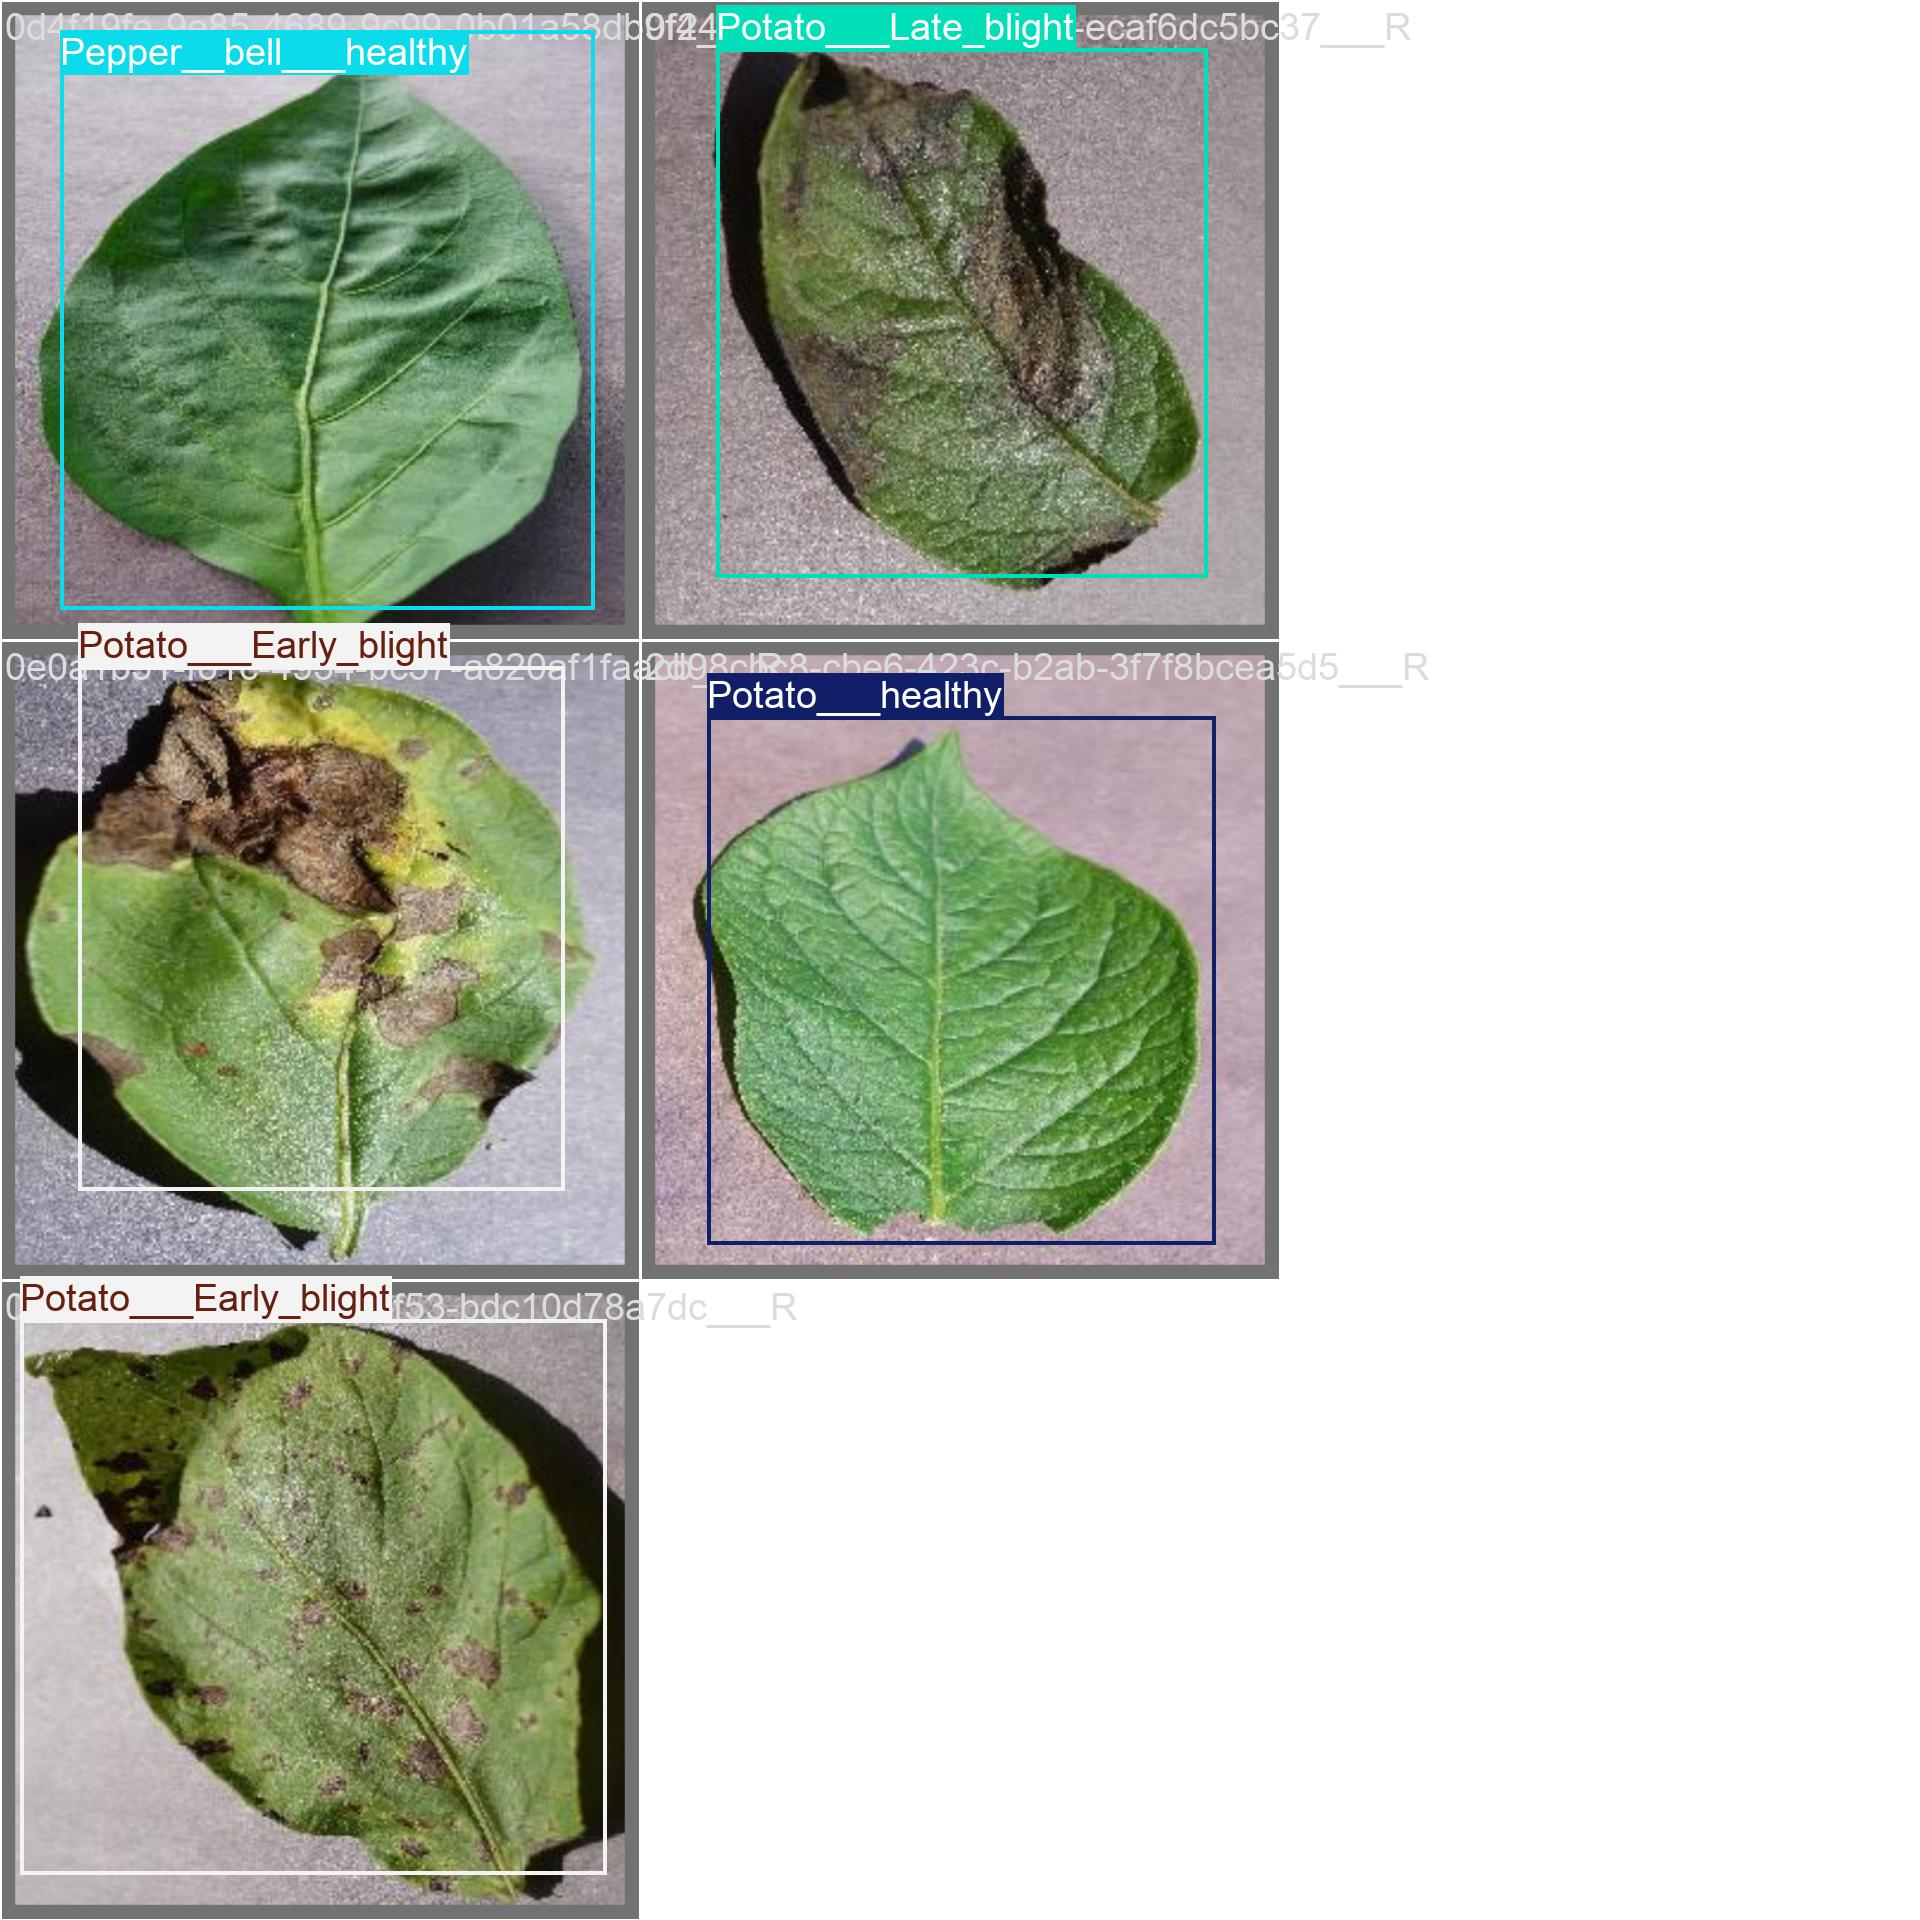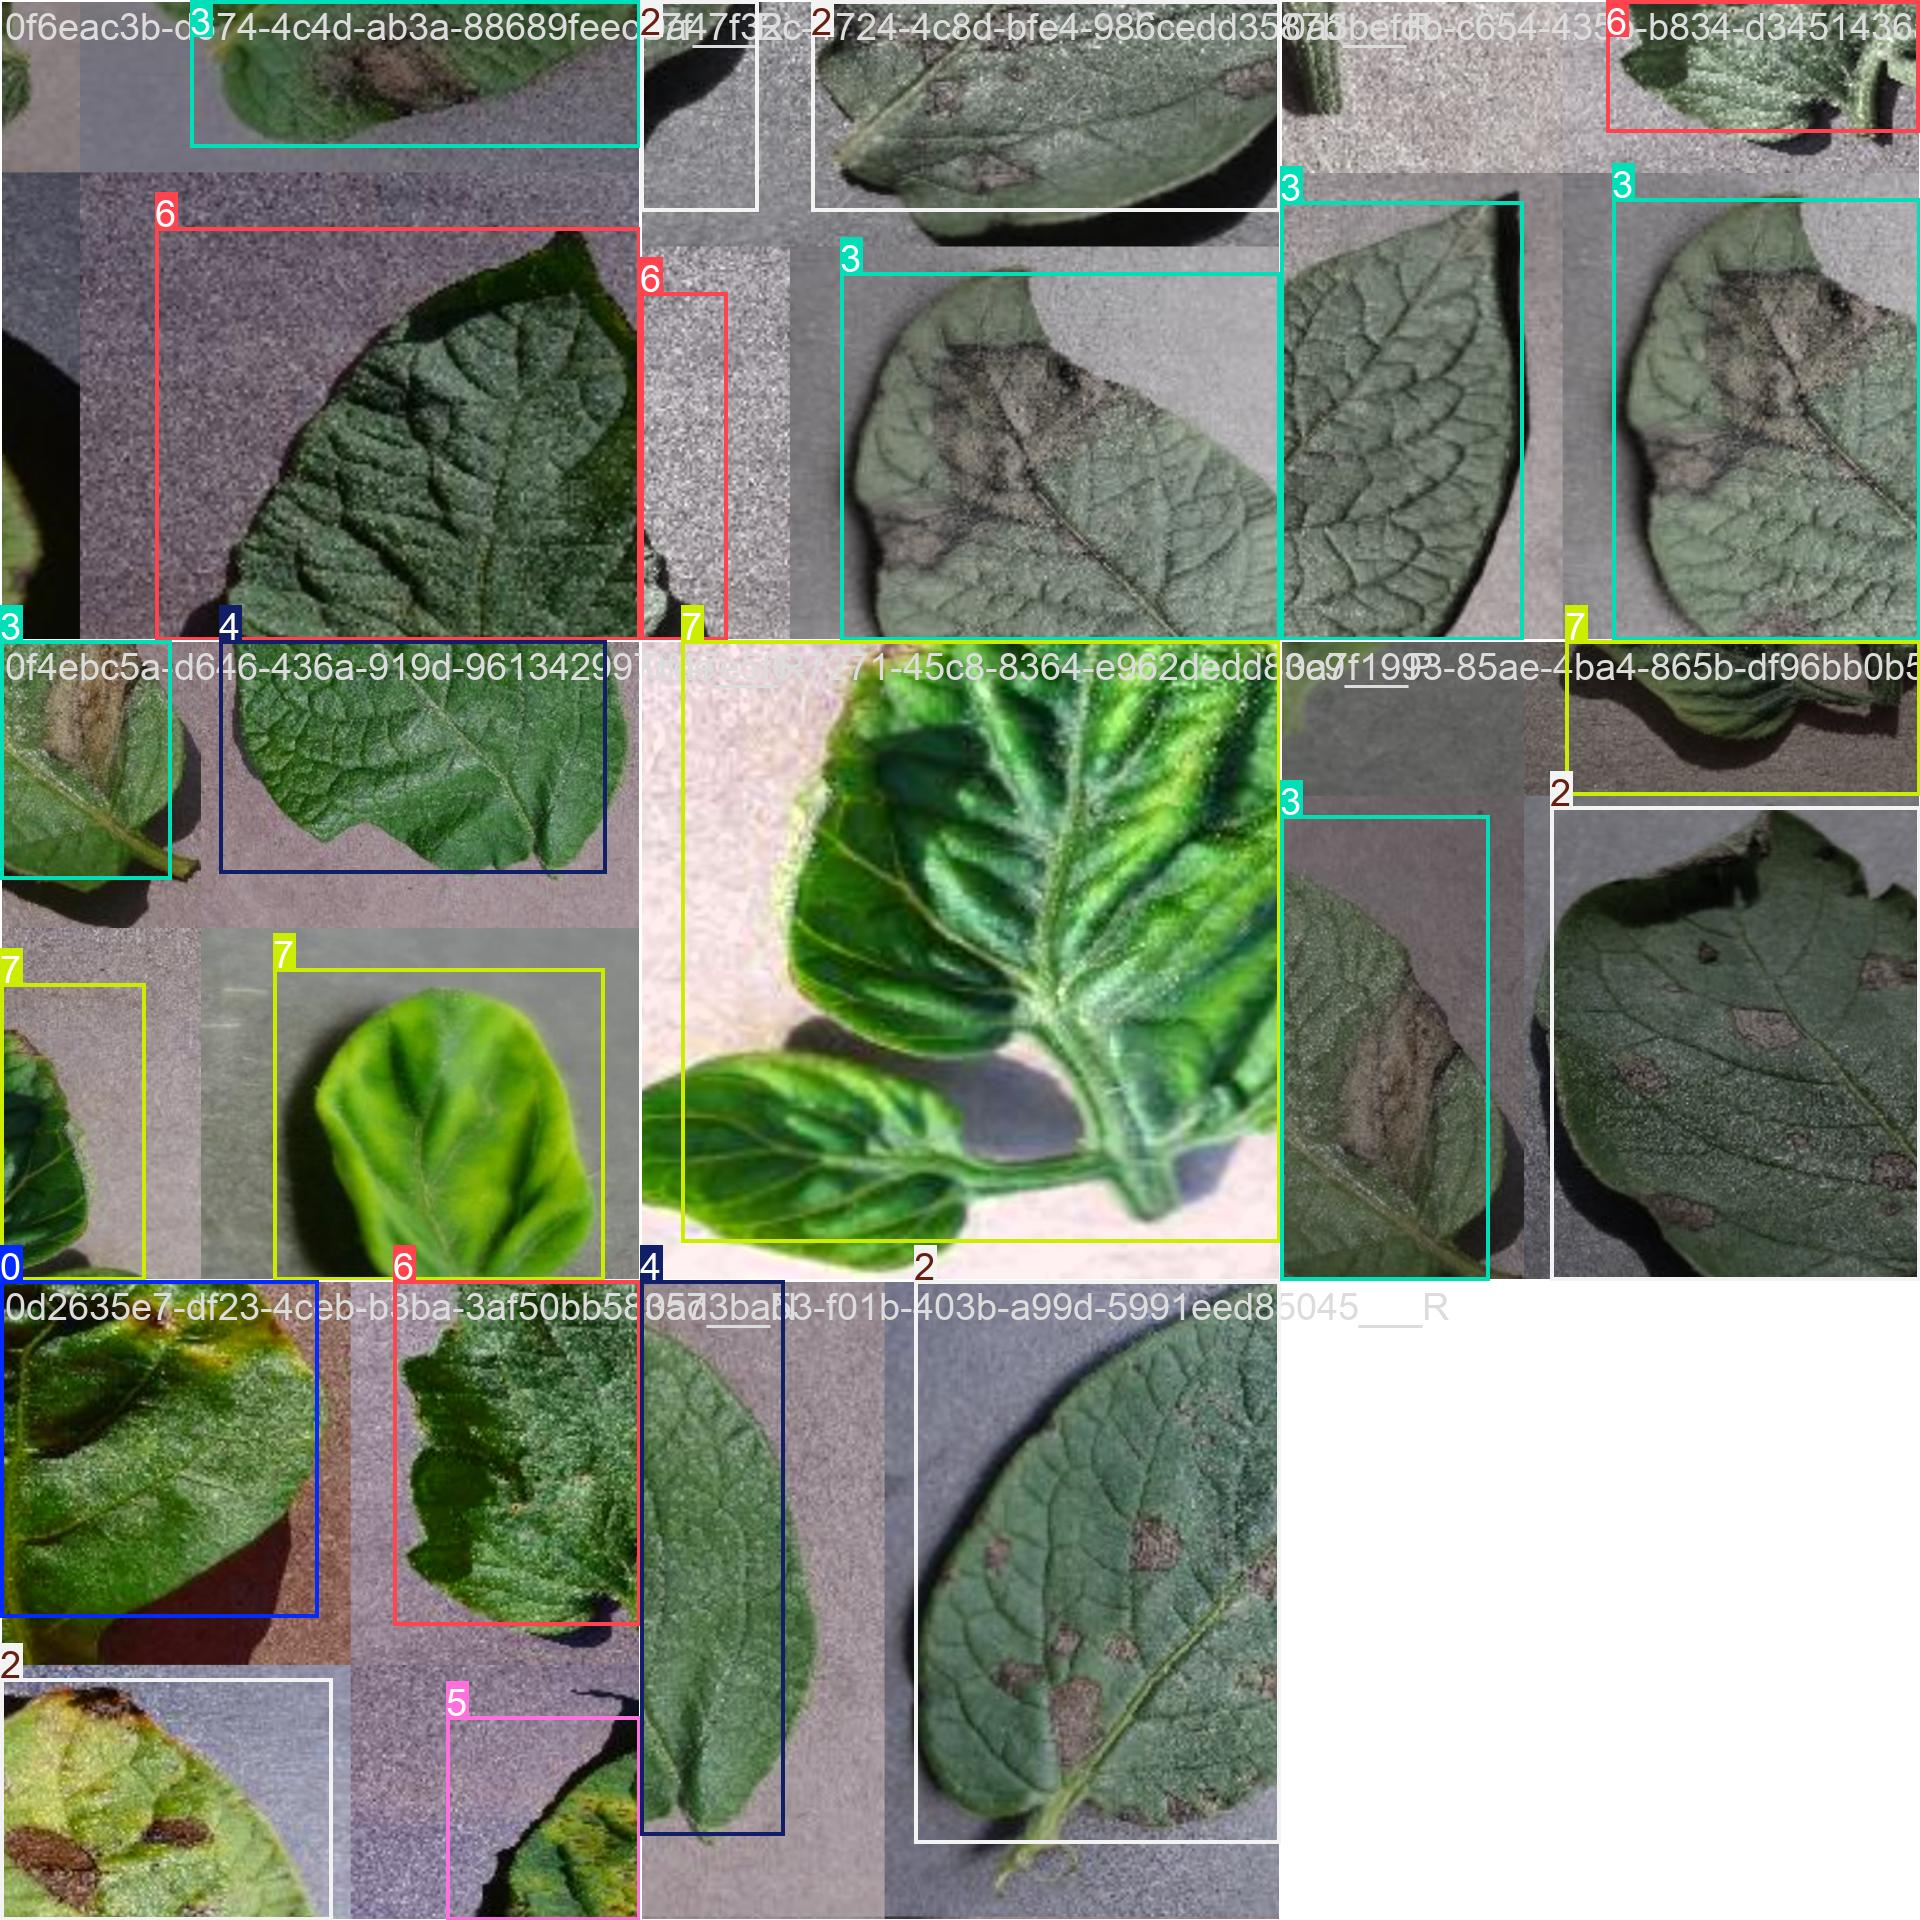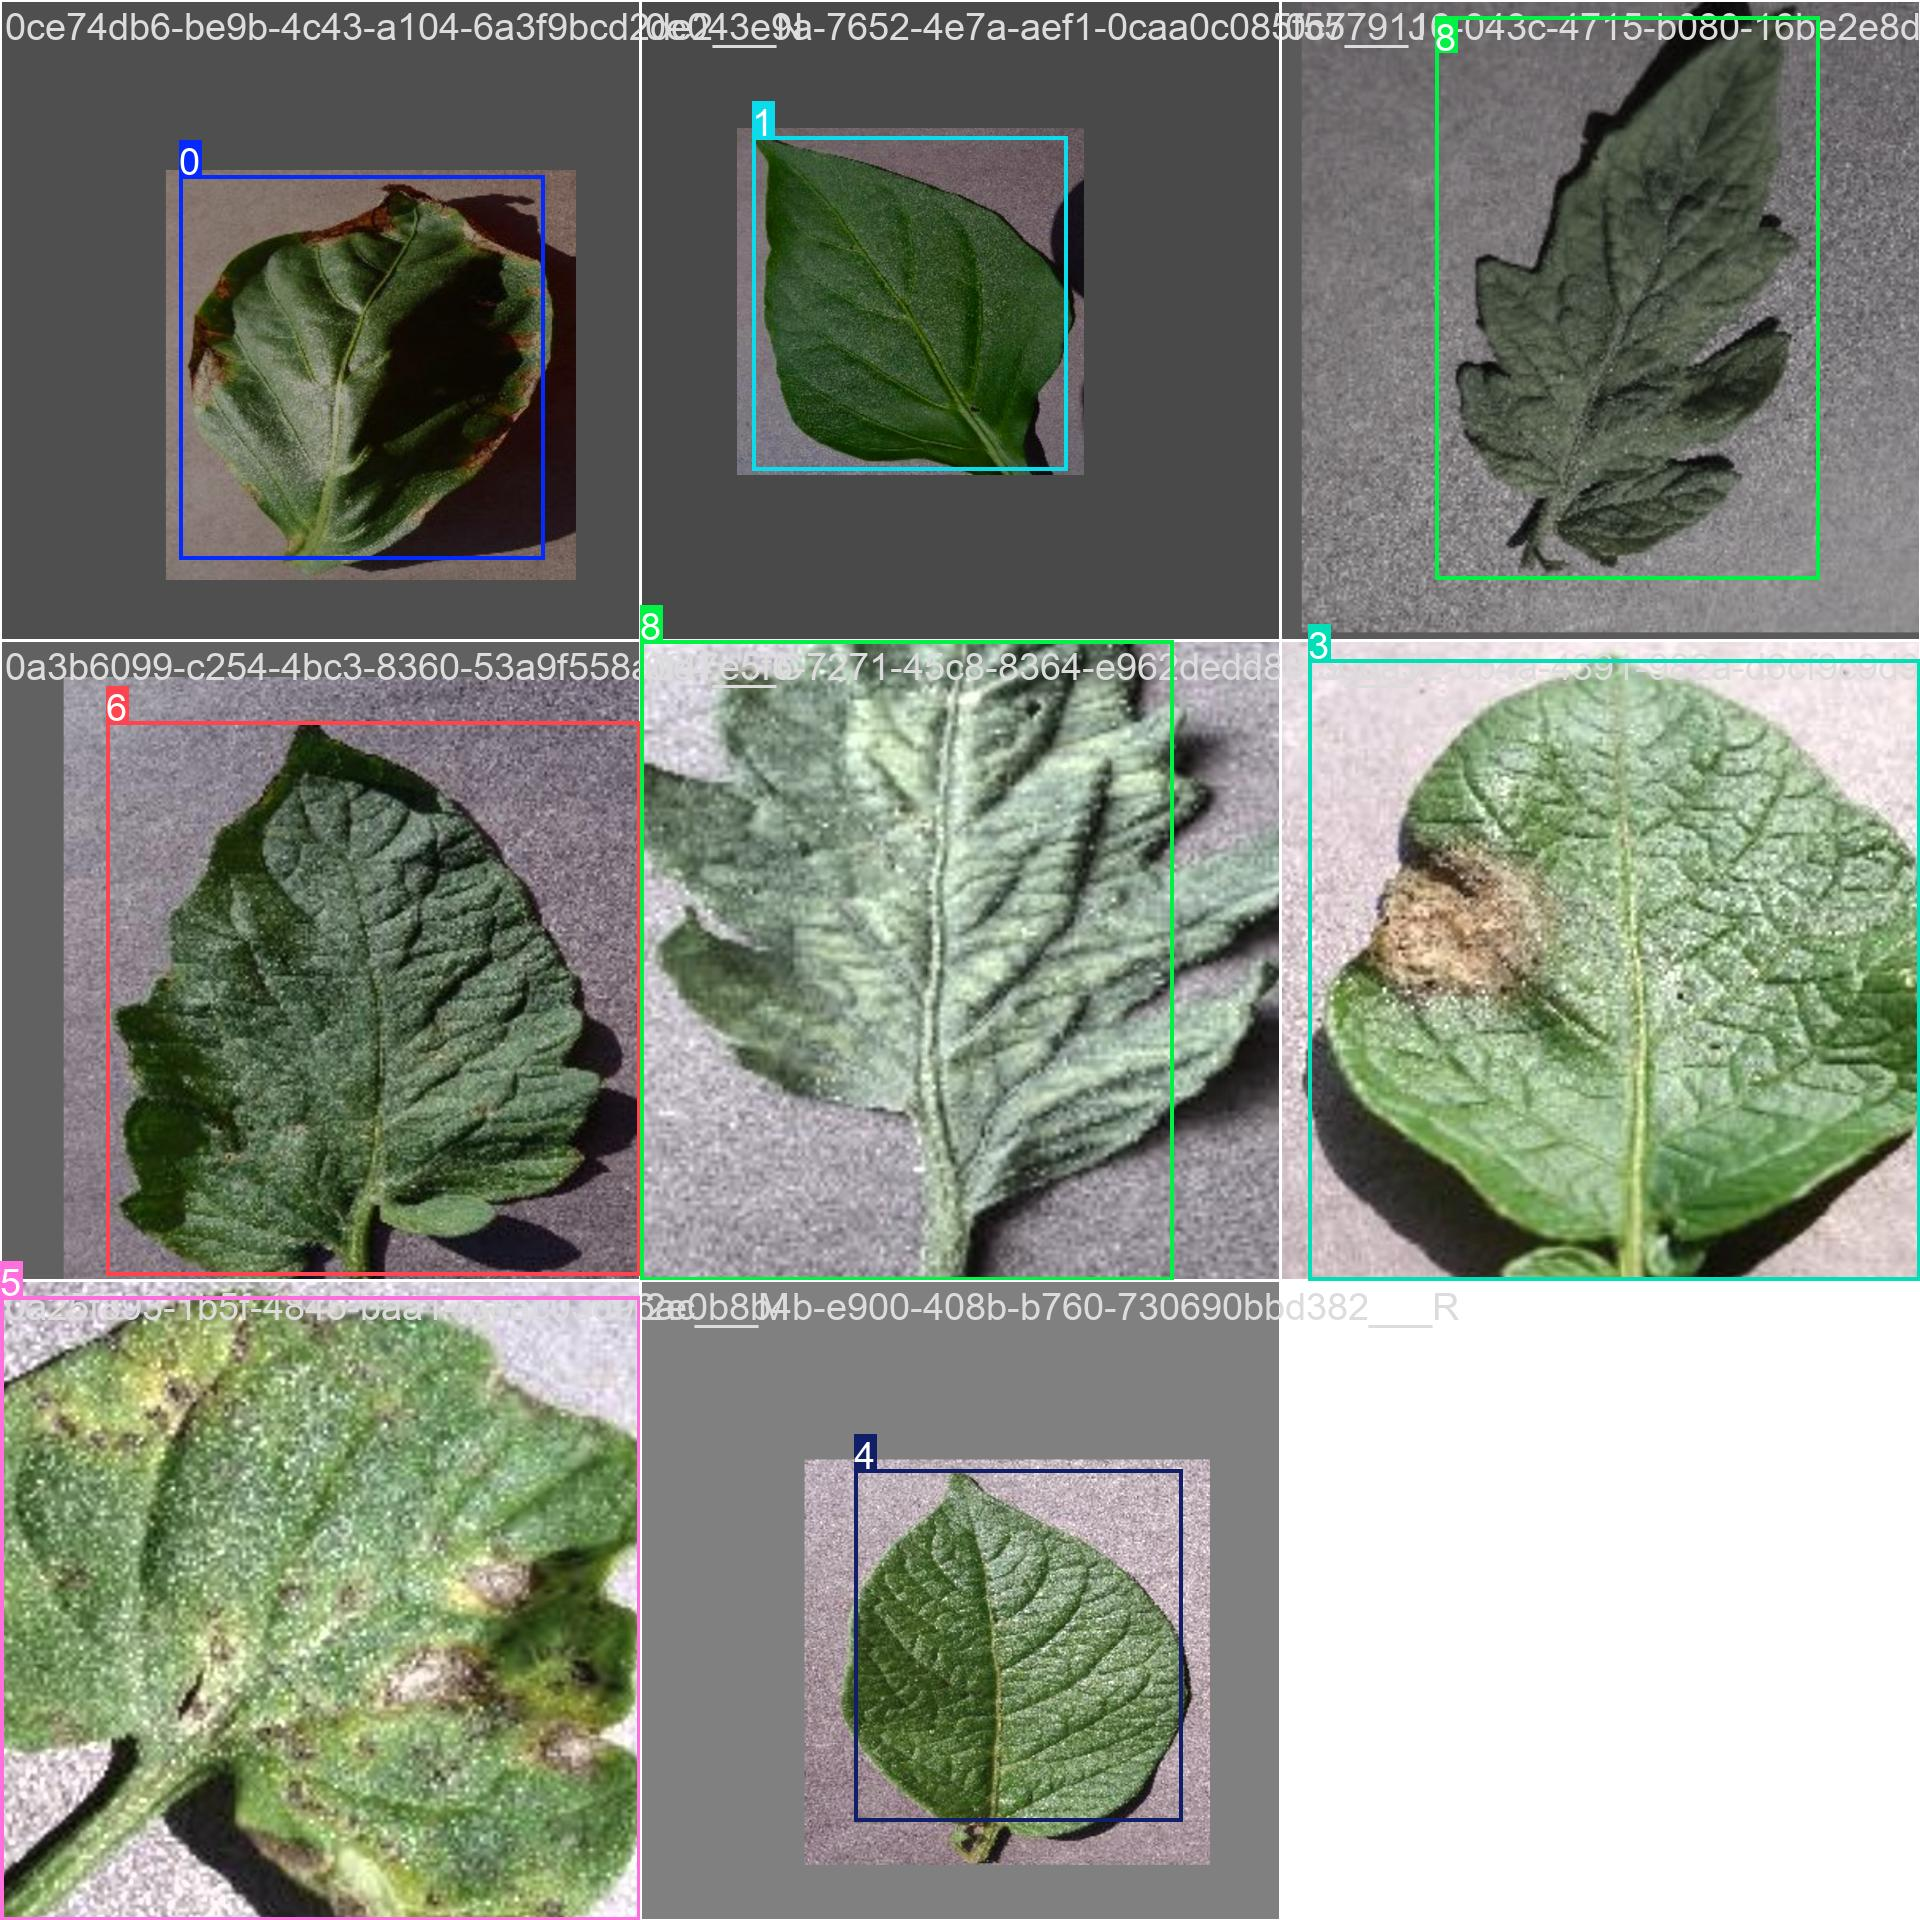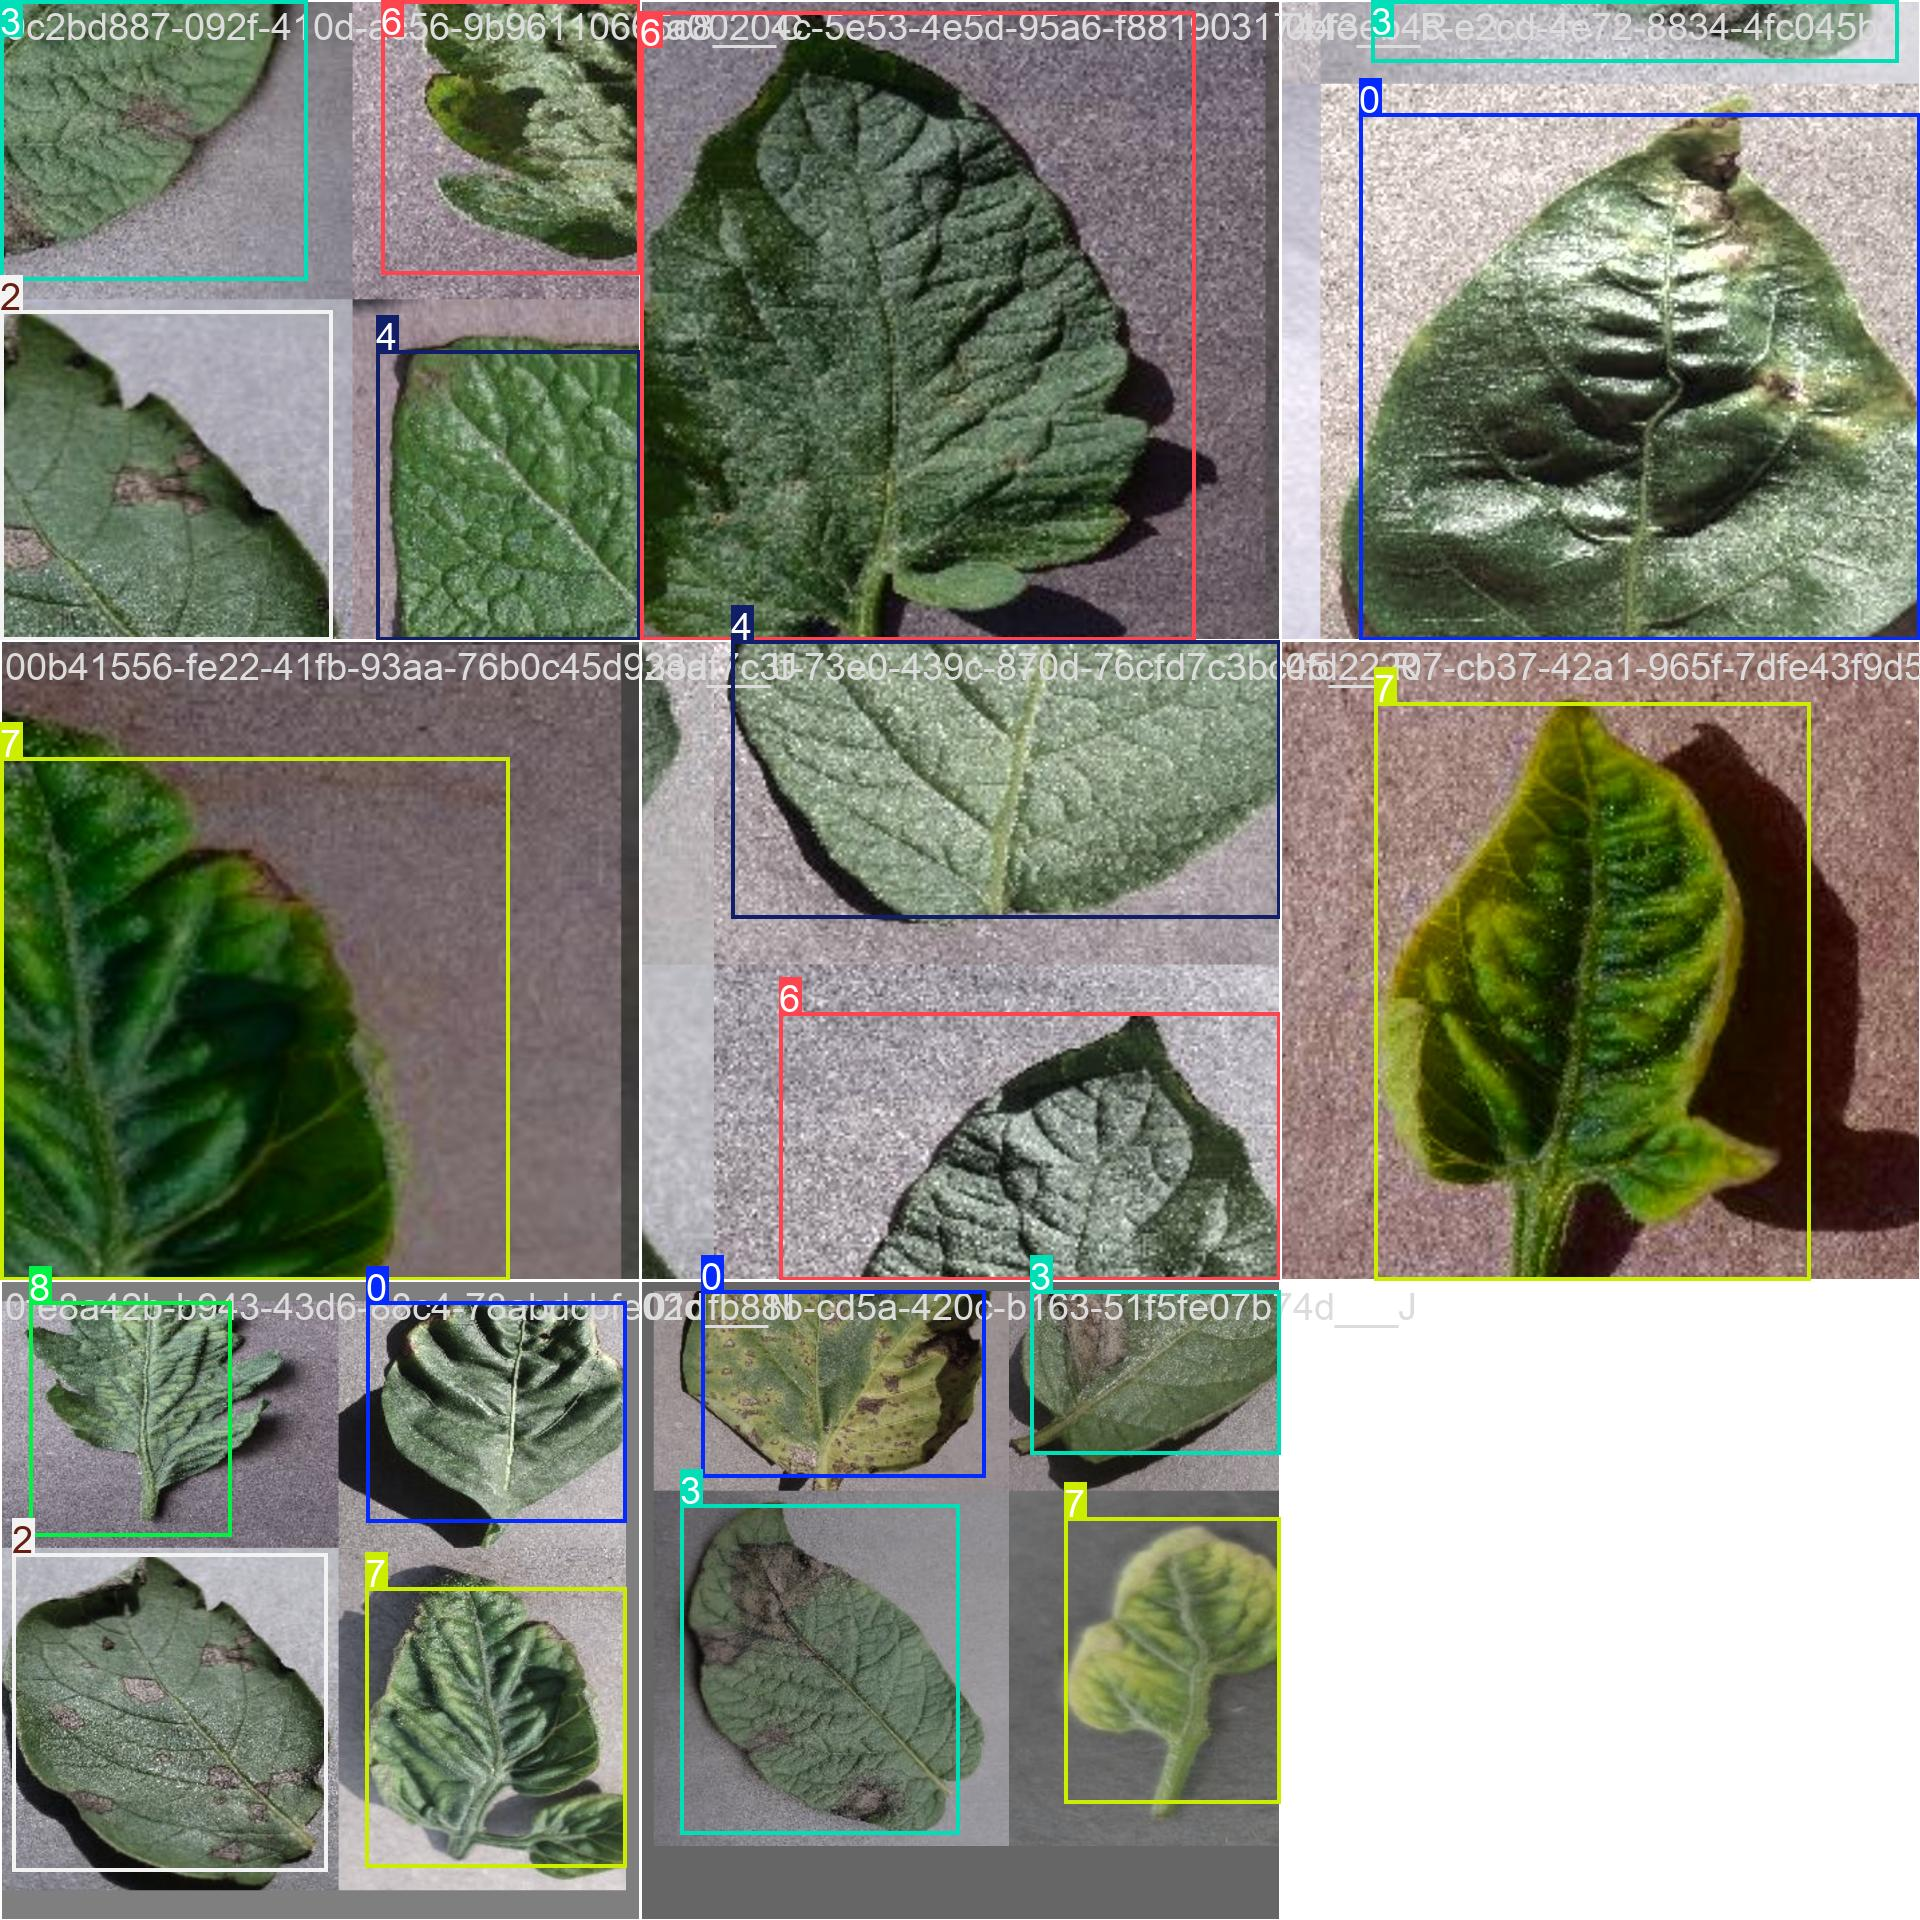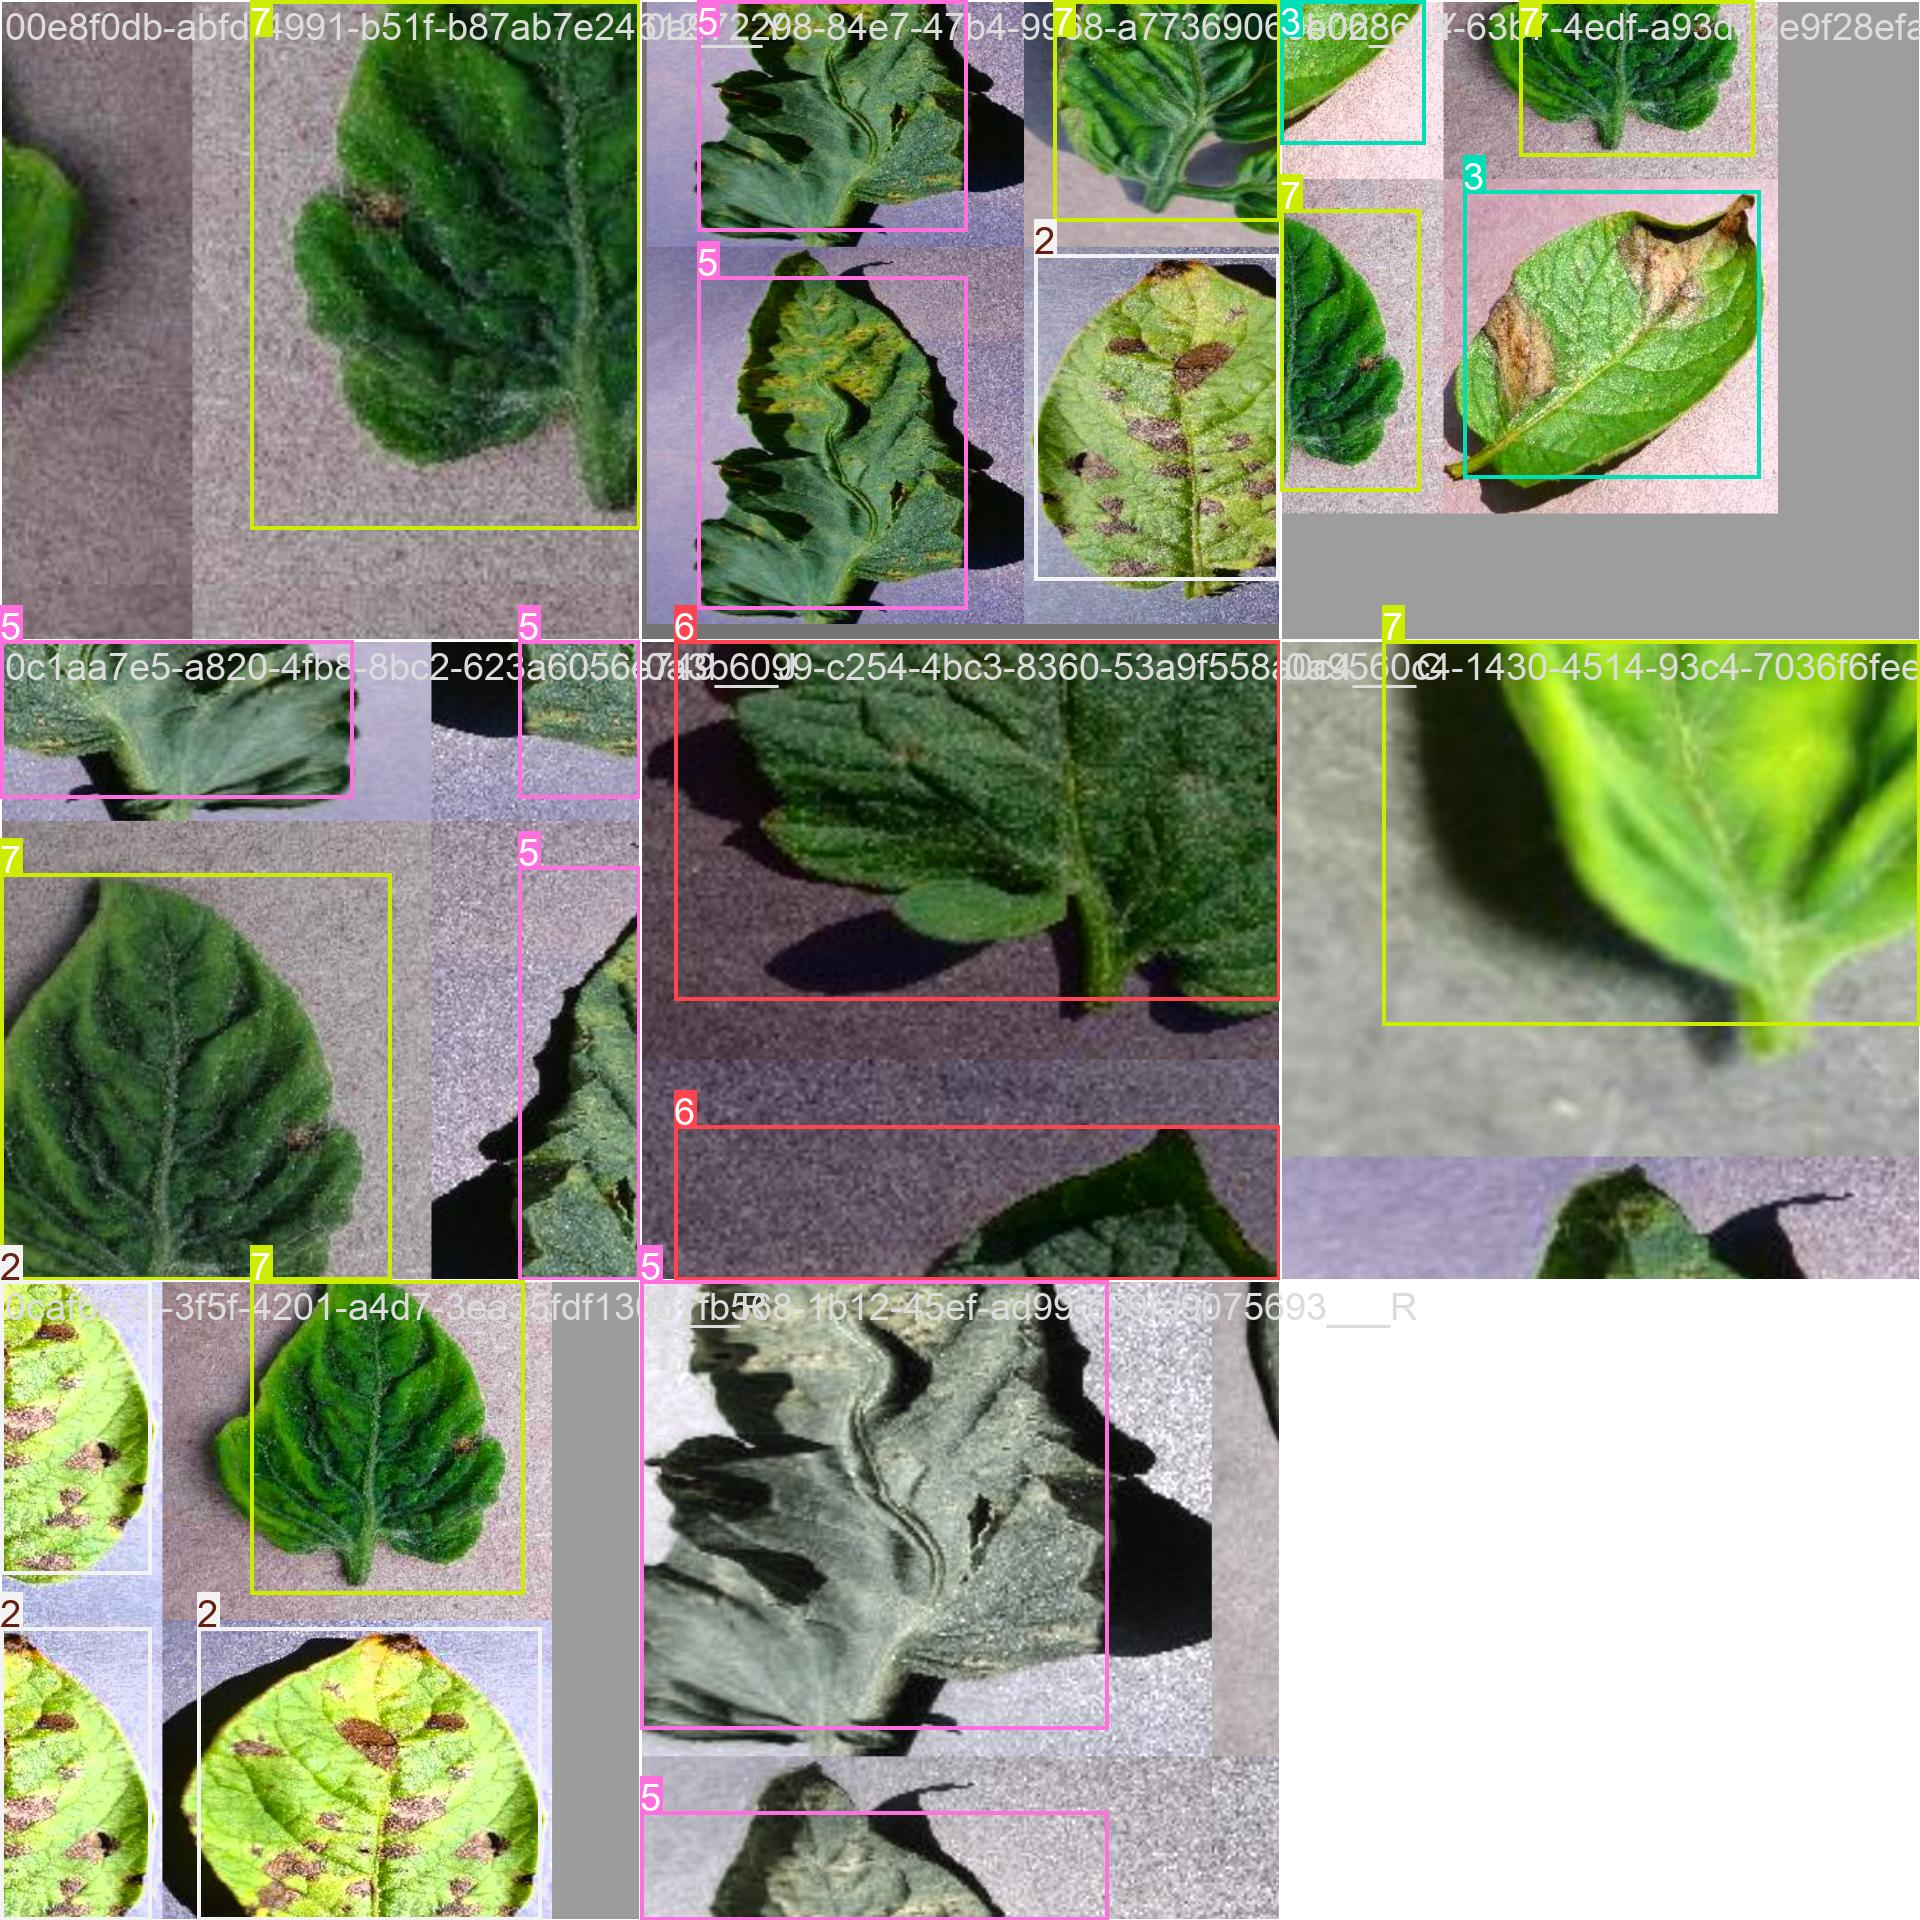

# sample test.jpg

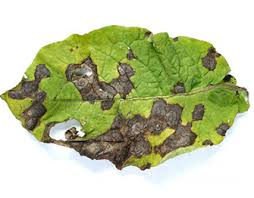

test.jpg output

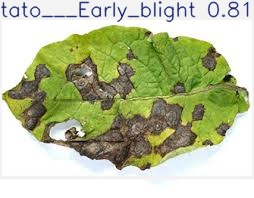